In [ ]:
#import sys
#!{sys.executable} -m pip install graphgym

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]=""
os.environ["OMP_NUM_THREADS"] = "1"

import random
import numpy as np
import torch
SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

import gc
import time
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torch_geometric.data import HeteroData, Data, NeighborSampler
from torch_geometric.utils import to_undirected
from torch_geometric.nn import SAGEConv
from torch_geometric.utils import degree
from torch_cluster import random_walk
from sklearn.preprocessing import OneHotEncoder
import torch_sparse
from scipy.spatial import Delaunay

from sklearn.cluster import KMeans

from sklearn.metrics import f1_score

import graphgym

import networkx as nx

from sklearn.neighbors import kneighbors_graph, radius_neighbors_graph

from scipy.spatial import Delaunay

from sklearn.model_selection import cross_val_score


from sklearn.metrics.cluster import adjusted_rand_score

In [3]:
import pygraphviz


In [4]:
#Input: Node embeddings and true community labels
#Output: CV score for labels
#X is the embeddings for node vi and y is which cell vi belongs to.
#using Rand Metric
def emb_metric(df, emb):
    if isinstance(df, pd.DataFrame):
        y = df['CellType']
    else:
        y = df
    n_cells = len(y.unique())
    X = emb
    #clf = LogisticRegression(verbose=False, n_jobs=-1)
    #clf = LogisticRegression(verbose=False, n_jobs=-1)
    kmn = KMeans(n_clusters=n_cells)
    #logstc = cross_val_score(clf, X, y, scoring='f1_weighted', cv=5)
    #clf = LinearSVC()
    cv = cross_val_score(kmn, X, y, scoring='adjusted_rand_score', cv=5)
    return (cv.mean())

In [5]:
df_r = pd.read_csv('data2eliaz.csv')
df_r.head()

,X,Y,Gene,CellType,Cell,DatasetId
0,3.587971,231.664744,Chrm2,Ntng1.Chrm2,0,15
1,3.131251,225.208978,Chrm2,Ntng1.Chrm2,0,15
2,-8.323954,219.529340,Calm2,Ntng1.Chrm2,0,15
3,-2.128415,225.552644,Rgs4,Ntng1.Chrm2,0,15
4,6.154294,225.249389,Chrm2,Ntng1.Chrm2,0,15


In [6]:
df = pd.read_csv('simulated_data.csv')
df.head()

,Unnamed: 0,x,y,gene,cell type,cell,seed
0,0,39.074900,82.024595,3,3,2,0
1,1,43.309044,76.826010,2,3,2,0
2,2,47.126585,81.966064,2,3,2,0
3,3,43.123820,96.778216,3,3,2,0
4,4,55.168696,65.554417,3,3,2,0


In [7]:

sim_data_real = []
for i in range(15,30):
    sim_data_real.append(df_r[df_r['DatasetId']==i])


In [8]:
def convert_dataframe_to_tuples(df):
    tuples_list = []
    for index, row in df.iterrows():
        tuple_row = (row[0], row[1])
        tuples_list.append(tuple_row)
    return tuples_list


In [9]:
avg_clust_bsc = avg_clust

NameError: name 'avg_clust' is not defined

In [ ]:
clus_df = pd.DataFrame(avg_)

In [577]:
avg_clust_bsc

[[0.5506346983237745,
  0.658838357438663,
  0.738897739084509,
  0.4393181515030254,
  0.5097834149236019,
  0.7898636163899729,
  0.8870202908065453],
 [0.5685352622061478,
  0.6660068714251544,
  0.7458208359759668,
  0.44531846493871746,
  0.4911458333333335,
  0.5471040564373899,
  0.914094293316144],
 [0.5585583984837712,
  0.6657535625503817,
  0.7479739482270696,
  0.4461823996898624,
  0.5294479981047142,
  0.8370632614806899,
  0.9142795492652191],
 [0.5568232518232524,
  0.6599804157389288,
  0.7389921516656653,
  0.4435695085695082,
  0.5010939510939516,
  0.7924062622707861,
  0.9100043944218241],
 [0.562339877471455,
  0.6657975709215455,
  0.7455927424586695,
  0.44335526396929864,
  0.37914827719705796,
  0.4998605913860153,
  0.9086492666888718],
 [0.5842719996402723,
  0.6751866569709424,
  0.7632663072749278,
  0.4407828400746243,
  0.45427821522309714,
  0.5980182421227203,
  0.8980688341855066],
 [0.5584094143404491,
  0.647372526456971,
  0.7137195576438231,
  0.4

In [10]:
clus_df = pd.DataFrame(avg_clust)

NameError: name 'avg_clust' is not defined

In [247]:
clus_df.columns = [['KNN_Graph_5', 'KNN_Graph_10', 'KNN_Graph_15', 'Delunay Graph', 'K_distance_90', 'K_distance_95', 'K_distance_99']]

In [ ]:
clus_df

In [248]:
clus_df.mean()

KNN_Graph_5      0.559585
KNN_Graph_10     0.662423
KNN_Graph_15     0.742359
Delunay Graph    0.442318
K_distance_90    0.500465
K_distance_95    0.668484
K_distance_99    0.900557
dtype: float64

In [249]:
clus_df.std()

KNN_Graph_5      0.012658
KNN_Graph_10     0.005069
KNN_Graph_15     0.004895
Delunay Graph    0.004243
K_distance_90    0.013179
K_distance_95    0.171657
K_distance_99    0.019144
dtype: float64

In [60]:
sim_data

[     Unnamed: 0           x           y  gene  cell type  cell  seed
 0             0   39.074900   82.024595     3          3     2     0
 1             1   43.309044   76.826010     2          3     2     0
 2             2   47.126585   81.966064     2          3     2     0
 3             3   43.123820   96.778216     3          3     2     0
 4             4   55.168696   65.554417     3          3     2     0
 ..          ...         ...         ...   ...        ...   ...   ...
 709         709  611.108352   21.654785     5          6    -1     0
 710         710  160.081528  964.468026     5          6    -1     0
 711         711  708.654633  305.908524     5          6    -1     0
 712         712  119.163964  312.168280     5          6    -1     0
 713         713  696.817848  675.068074     5          6    -1     0
 
 [714 rows x 7 columns],
       Unnamed: 0           x           y  gene  cell type  cell  seed
 714          714   32.102051  215.214883     1          4    

In [80]:
df = sim_data[5]

In [84]:
df_nds = pd.DataFrame(data= enc.transform(df['gene'].reset_index(drop=True).to_numpy().reshape(-1,1)),index=df['gene'].index)
gene_list = df['gene'].unique()
enc = OneHotEncoder(sparse=False).fit(gene_list.reshape(-1, 1))
xy = df[['x','y']].to_numpy()
df_nodes = sim_data[i]['gene']
df_edgs = Delunay_graph(xy)
df_edges_index = df_edgs[['source', 'target']].applymap(index_dict.get)
print(df_edges_index)
emb = PGNN_comp(df_nds, df_edgs)

/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


NameError: name 'index_dict' is not defined

In [89]:
from sklearn.metrics.cluster import rand_score

In [137]:
df_nodes

0      2
9      2
38     2
20     3
19     2
      ..
674    5
680    5
692    5
681    5
684    5
Name: gene, Length: 697, dtype: int64

In [109]:
sim_data[i]

,Unnamed: 0,x,y,gene,cell type,cell,seed
6361,6361,22.585565,355.148949,2,3,7,9
6362,6362,27.856746,362.982814,2,3,7,9
6363,6363,24.280698,377.013546,2,3,7,9
6364,6364,32.679922,787.120705,3,2,1,9
6365,6365,26.755108,367.414163,3,3,7,9
...,...,...,...,...,...,...,...
7061,7061,995.131074,552.507056,5,6,-1,9
7062,7062,729.365445,57.730807,5,6,-1,9
7063,7063,474.197924,331.365337,5,6,-1,9
7064,7064,814.141448,662.864714,5,6,-1,9


In [231]:
ran_cl

-0.0016349009899022063

In [252]:
ran_cl

-0.0010121792097466317

In [440]:
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [369]:
sim_data_real[0]['CellType']

0           Ntng1.Chrm2
1           Ntng1.Chrm2
2           Ntng1.Chrm2
3           Ntng1.Chrm2
4           Ntng1.Chrm2
             ...       
2587    Pvalb.Tac1.Syt2
2588    Pvalb.Tac1.Syt2
2589    Pvalb.Tac1.Syt2
2590    Pvalb.Tac1.Syt2
2591    Pvalb.Tac1.Syt2
Name: CellType, Length: 2592, dtype: object

In [388]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib

In [465]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

def scatter_plot_with_colors(data, cell_types, title):
    """
    Create a scatter plot with different colors based on cell types.

    Parameters:
    - data (ndarray): Two-dimensional array of data points (n x 2).
    - cell_types (list): List of cell types (strings).

    Example usage:
    scatter_plot_with_colors(data, ['Cell Type A', 'Cell Type B', 'Cell Type C', ...])
    """
    
    # Create a color mapping from cell types to colors
    unique_cell_types = np.unique(cell_types)
    color_map = plt.cm.get_cmap('tab20', len(unique_cell_types))  # Choose a colormap
    cell_type_to_color = {cell_type: color_map(i) for i, cell_type in enumerate(unique_cell_types)}

    # Generate colors for data points based on cell types
    colors = [cell_type_to_color[cell_type] for cell_type in cell_types]
    
    plt.figure(figsize=(14,14))

    # Create the scatter plot
    for i in range(len(data)):
        plt.scatter(data[i, 0], data[i, 1], c=colors[i], label=cell_types[i])

    # Create custom legend elements
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=cell_type, markersize=8, markerfacecolor=color)
                       for cell_type, color in cell_type_to_color.items()]

    # Customize the plot with the legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.legend(handles=legend_elements, title="Cell Types", loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.show()


In [466]:
def visualize(h, cell_types, title):
    z = TSNE(n_components=2).fit_transform(h)
    scatter_plot_with_colors(z, cell_types, title)
    #plt.figure(figsize=(10,10))
    #plt.xticks([])
    #plt.yticks([])

    #plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    #plt.show()

In [418]:
sim_data_real[1]['CellType']

2592           Eryth.2
2593           Eryth.2
2594           Eryth.2
2595           Eryth.2
2596           Eryth.2
             ...      
3997    Pvalb.Tac1.Sst
3998    Pvalb.Tac1.Sst
3999    Pvalb.Tac1.Sst
4000    Pvalb.Tac1.Sst
4001    Pvalb.Tac1.Sst
Name: CellType, Length: 1410, dtype: object

In [431]:
vis1 = sim_data_real[1]['CellType'].reset_index(drop=True)

In [414]:
len(embed[0])

1410

In [432]:
sim_data_real[1]['CellType'].reset_index(drop=True)

0              Eryth.2
1              Eryth.2
2              Eryth.2
3              Eryth.2
4              Eryth.2
             ...      
1405    Pvalb.Tac1.Sst
1406    Pvalb.Tac1.Sst
1407    Pvalb.Tac1.Sst
1408    Pvalb.Tac1.Sst
1409    Pvalb.Tac1.Sst
Name: CellType, Length: 1410, dtype: object

/var/folders/v_/t8sj0x6d40df4js90kcjqysr0000gn/T/ipykernel_9340/2350601907.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(unique_cell_types))  # Choose a colormap
/var/folders/v_/t8sj0x6d40df4js90kcjqysr0000gn/T/ipykernel_9340/2350601907.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data[i, 0], data[i, 1], c=colors[i], label=cell_types[i])


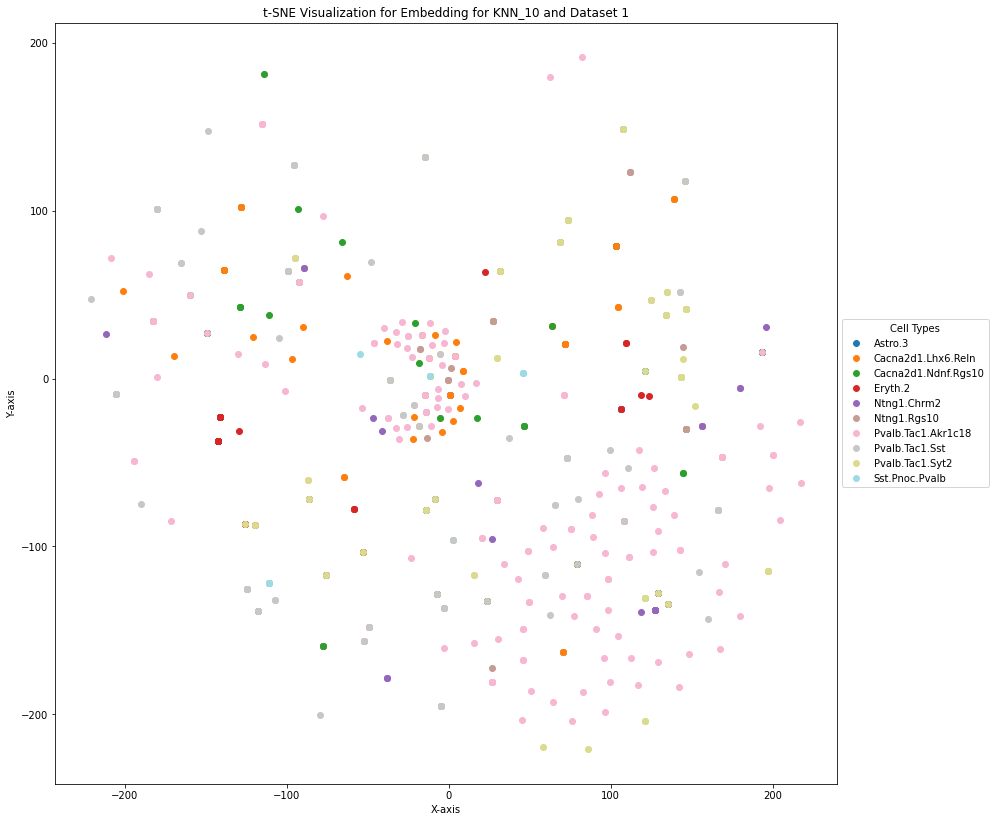

In [467]:
visualize(embed[1], sim_data_real[1]['CellType'].reset_index(drop=True), title= 't-SNE Visualization for Embedding for KNN_10 and Dataset 1')

/var/folders/v_/t8sj0x6d40df4js90kcjqysr0000gn/T/ipykernel_9340/2350601907.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(unique_cell_types))  # Choose a colormap
/var/folders/v_/t8sj0x6d40df4js90kcjqysr0000gn/T/ipykernel_9340/2350601907.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data[i, 0], data[i, 1], c=colors[i], label=cell_types[i])


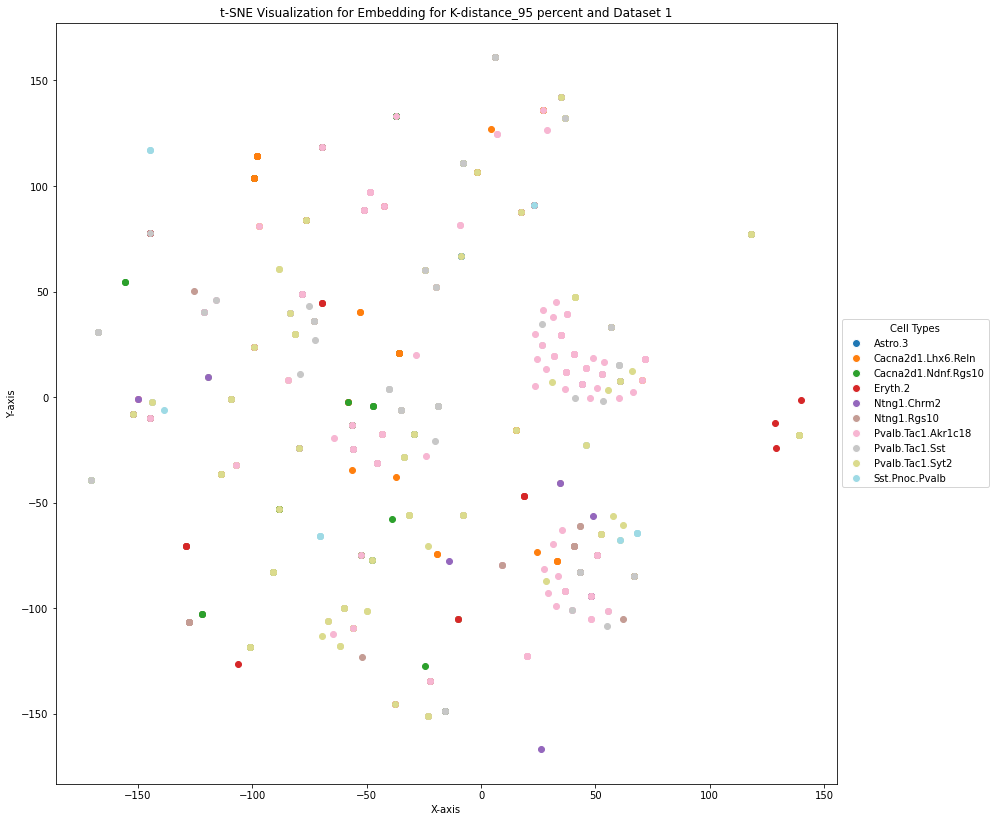

In [470]:
visualize(embed[6], sim_data_real[1]['CellType'].reset_index(drop=True), title= 't-SNE Visualization for Embedding for K-distance_95 percent and (DS 1)')

In [485]:
sim_data_real[13]

,X,Y,Gene,CellType,Cell,DatasetId
21220,17.544610,175.197213,Cdh13,Pvalb.Tac1.Sst,0,28
21221,20.887148,174.616163,Aldoc,Pvalb.Tac1.Sst,0,28
21222,24.740806,188.444950,Tmsb10,Pvalb.Tac1.Sst,0,28
21223,17.592513,182.607812,Npy,Pvalb.Tac1.Sst,0,28
21224,17.749827,175.620694,Npy,Pvalb.Tac1.Sst,0,28
...,...,...,...,...,...,...
22689,496.790701,34.650818,Pvalb,Pvalb.Tac1.Syt2,47,28
22690,496.108762,33.116601,Prkca,Pvalb.Tac1.Syt2,47,28
22691,486.445428,28.006704,Pvalb,Pvalb.Tac1.Syt2,47,28
22692,491.796860,36.198252,Atp1b1,Pvalb.Tac1.Syt2,47,28


In [608]:
dst[0]

array([ 0.        ,  5.8792962 ,  8.62420445,  8.96495506, 12.85277352,
       16.32127971, 18.06834346, 20.97173922, 22.49539185, 23.82252147,
       25.92078723, 27.05784268])

In [676]:
df_nodes

0        Npy
9       Reln
12      Gad1
10      Reln
17       Npy
       ...  
205     Plp1
209    Enpp2
211     Plp1
197     Plp1
206     Plp1
Name: Gene, Length: 209, dtype: object

In [657]:
#Graph Structure creation
Graphs = []
k_pars = [5,10,15]
pct_par = [90,95,99]
results =[]
embed =[]
avg_clust = []
r_s = []
r_f = []
r = []
r_sc_cv = []
rand_sc =[]
rndm_p = []
for i in range(0,15):
    print("Dataset" + str(i))
    #compute KNN graph and metric for different k-parameters
    clust = []
    r_score = []
    r = []
    df = sim_data_real[i].reset_index(drop=True)
    #create encoding for each dataset
    gene_list = df['Gene'].unique()
    enc = OneHotEncoder(sparse=False).fit(gene_list.reshape(-1, 1))
    #df_nds.reset_index()
    df_nds = pd.DataFrame(data= enc.transform(df['Gene'].reset_index(drop=True).to_numpy().reshape(-1,1)),index=df['Gene'].index)
    cell_list = df['CellType'].unique()
    xy = df[['X','Y']].to_numpy()
    df_nodes = sim_data_real[i]['Gene']
    for k in k_pars:
        df_edgs = knn_graph(xy,k)
        df_ed = convert_dataframe_to_tuples(df_edgs)
        G = nx.from_edgelist(df_ed)
        Graphs.append(G)
        clust.append(nx.average_clustering(G))
        #nx.draw(G)
        #df_nds = pd.DataFrame(data=gene_vector, index=sim_data[i]['gene'].index)
        #df_nds.reset_index()
        emb = GNN_compute(df_nds, df_edgs)
        embed.append(emb)
        #fit embedding space with Kmeans and number of different cell types
        clusters = KMeans(n_clusters=len(cell_list)).fit_predict(emb)
        r_sc = adjusted_rand_score(df_nodes,clusters)
        r.append(r_sc)
        r_cv_sc = emb_metric(df, emb)
        r_score.append(r_cv_sc)
        #pd.DataFrame(data=, columns=gene_list)
        f1.append(f_sc)
        df_nds.reset_index()
    
    df_edgs = Delunay_graph(xy)
    df_ed = convert_dataframe_to_tuples(df_edgs)
    G = nx.from_edgelist(df_ed)
    Graphs.append(G)
    #nx.draw(G)
    clust.append(nx.average_clustering(G))
    emb = GNN_compute(df_nds, df_edgs)
    embed.append(emb)
    clusters = KMeans(n_clusters=len(cell_list)).fit_predict(emb)
    r_sc = adjusted_rand_score(df_nodes,clusters)
    r.append(r_sc)
    #r_sc = rand_score(df_nodes,clusters)
    r_cv_sc = emb_metric(df, emb)
    r_score.append(r_cv_sc)
    #rl = relabel(df_nodes,clusters)
    #f_sc = f1_score(df_nodes, rl, average='micro')
    #f1.append(f_sc)
    df_nds.reset_index()
    #avg_clust.append(clust)
    #f1_s.append(f1)
    df_nds.reset_index()
    xy = df[['X','Y']]
    print("KD_graph")
    for p in pct_par:
        df_nodes,df_edgs,df_ct, df_x, df_y = kd_graph(df,xy,p)
        df_ed = convert_dataframe_to_tuples(df_edgs)
        G = nx.from_edgelist(df_ed)
        Graphs.append([G,df_nodes])
        clust.append(nx.average_clustering(G))
        #df_nds = pd.DataFrame(data=gene_vector, index=sim_data[i]['gene'].index)
        #df_nds.reset_index()
        df_nds = pd.DataFrame(data= enc.transform(df_nodes.reset_index(drop=True).to_numpy().reshape(-1,1)),index=df_nodes.index)
        emb = GNN_compute(df_nds, df_edgs)
        embed.append(emb)
        r_cv_sc = emb_metric(df_ct, emb)
        r_score.append(r_cv_sc)
        clusters = KMeans(n_clusters=len(cell_list)).fit_predict(emb)
        r_sc = adjusted_rand_score(df_ct,clusters)
        r.append(r_sc)
       #print(len(df_nds))
        #print(len(clusters))
        #rl = relabel(df_nodes.to_numpy(),clusters)
        #f_sc = f1_score(df_nodes, rl, average='micro')
        #pd.DataFrame(data=, columns=gene_list)
        df_nds.reset_index()
    ran_cl = 0
    #for i in range(0,5):
    rng = np.random.default_rng()
    p = rng.permutation(df['CellType'])
        #ran_cl = ran_cl + adjusted_rand_score(df['cell type'], p)
    #ran_cl = ran_cl/5
    ran_cl = adjusted_rand_score(df['CellType'], p)
    avg_clust.append(clust)
    
    #
    df_nodes,df_edgs,df_ct, df_x, df_y = kd_degree_graph(df,xy)
    df_ed = convert_dataframe_to_tuples(df_edgs)
    G = nx.from_edgelist(df_ed)
    Graphs.append([G,df_nodes])
    clust.append(nx.average_clustering(G))
    df_nds = pd.DataFrame(data= enc.transform(df_nodes.reset_index(drop=True).to_numpy().reshape(-1,1)),index=df_nodes.index)
    emb = GNN_compute(df_nds, df_edgs)
    embed.append(emb)
    r_cv_sc = emb_metric(df_ct, emb)
    r_score.append(r_cv_sc)
    clusters = KMeans(n_clusters=len(cell_list)).fit_predict(emb)
    r_sc = adjusted_rand_score(df_ct,clusters)
    r.append(r_sc)
    #df_nds.reset_index()
    df_nds.reset_index()
    r_s.append(r_score)
    rand_sc.append(r)
    rndm_p.append(ran_cl)
        
        
    

Dataset0


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 0.9433
Epoch 02, Loss: 0.6382
Epoch 03, Loss: 0.6316
Epoch 04, Loss: 0.6300
Epoch 05, Loss: 0.6291
Epoch 06, Loss: 0.6286
Epoch 07, Loss: 0.6284
Epoch 08, Loss: 0.6281
Epoch 09, Loss: 0.6280
Epoch 10, Loss: 0.6279


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 0.9421
Epoch 02, Loss: 0.6375
Epoch 03, Loss: 0.6312
Epoch 04, Loss: 0.6297
Epoch 05, Loss: 0.6290
Epoch 06, Loss: 0.6285
Epoch 07, Loss: 0.6282
Epoch 08, Loss: 0.6280
Epoch 09, Loss: 0.6279
Epoch 10, Loss: 0.6278


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 0.9718
Epoch 02, Loss: 0.6396
Epoch 03, Loss: 0.6317
Epoch 04, Loss: 0.6301
Epoch 05, Loss: 0.6292
Epoch 06, Loss: 0.6287
Epoch 07, Loss: 0.6284
Epoch 08, Loss: 0.6282
Epoch 09, Loss: 0.6280
Epoch 10, Loss: 0.6279


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0582
Epoch 02, Loss: 0.6980
Epoch 03, Loss: 0.6572
Epoch 04, Loss: 0.6528
Epoch 05, Loss: 0.6513
Epoch 06, Loss: 0.6509
Epoch 07, Loss: 0.6500
Epoch 08, Loss: 0.6501
Epoch 09, Loss: 0.6494
Epoch 10, Loss: 0.6496


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 1.1709
Epoch 02, Loss: 0.7670
Epoch 03, Loss: 0.6678
Epoch 04, Loss: 0.6501
Epoch 05, Loss: 0.6460
Epoch 06, Loss: 0.6445
Epoch 07, Loss: 0.6437
Epoch 08, Loss: 0.6434
Epoch 09, Loss: 0.6434
Epoch 10, Loss: 0.6428


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0925
Epoch 02, Loss: 0.6827
Epoch 03, Loss: 0.6474
Epoch 04, Loss: 0.6407
Epoch 05, Loss: 0.6386
Epoch 06, Loss: 0.6379
Epoch 07, Loss: 0.6374
Epoch 08, Loss: 0.6367
Epoch 09, Loss: 0.6367
Epoch 10, Loss: 0.6362


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 0.9455
Epoch 02, Loss: 0.6633
Epoch 03, Loss: 0.6429
Epoch 04, Loss: 0.6388
Epoch 05, Loss: 0.6373
Epoch 06, Loss: 0.6369
Epoch 07, Loss: 0.6363
Epoch 08, Loss: 0.6361
Epoch 09, Loss: 0.6359
Epoch 10, Loss: 0.6358


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0273
Epoch 02, Loss: 0.6709
Epoch 03, Loss: 0.6502
Epoch 04, Loss: 0.6495
Epoch 05, Loss: 0.6459
Epoch 06, Loss: 0.6452
Epoch 07, Loss: 0.6447
Epoch 08, Loss: 0.6444
Epoch 09, Loss: 0.6442
Epoch 10, Loss: 0.6440


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset1


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 1.1621
Epoch 02, Loss: 0.6942
Epoch 03, Loss: 0.6410
Epoch 04, Loss: 0.6344
Epoch 05, Loss: 0.6322
Epoch 06, Loss: 0.6308
Epoch 07, Loss: 0.6301
Epoch 08, Loss: 0.6299
Epoch 09, Loss: 0.6297
Epoch 10, Loss: 0.6289


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0564
Epoch 02, Loss: 0.6694
Epoch 03, Loss: 0.6427
Epoch 04, Loss: 0.6362
Epoch 05, Loss: 0.6342
Epoch 06, Loss: 0.6326
Epoch 07, Loss: 0.6315
Epoch 08, Loss: 0.6308
Epoch 09, Loss: 0.6302
Epoch 10, Loss: 0.6296


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1530
Epoch 02, Loss: 0.6993
Epoch 03, Loss: 0.6463
Epoch 04, Loss: 0.6382
Epoch 05, Loss: 0.6344
Epoch 06, Loss: 0.6327
Epoch 07, Loss: 0.6315
Epoch 08, Loss: 0.6310
Epoch 09, Loss: 0.6304
Epoch 10, Loss: 0.6298


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2602
Epoch 02, Loss: 0.8342
Epoch 03, Loss: 0.6989
Epoch 04, Loss: 0.6581
Epoch 05, Loss: 0.6469
Epoch 06, Loss: 0.6431
Epoch 07, Loss: 0.6415
Epoch 08, Loss: 0.6406
Epoch 09, Loss: 0.6401
Epoch 10, Loss: 0.6397


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph
Epoch 01, Loss: 1.3245
Epoch 02, Loss: 0.9355
Epoch 03, Loss: 0.7690
Epoch 04, Loss: 0.7054
Epoch 05, Loss: 0.6769
Epoch 06, Loss: 0.6639
Epoch 07, Loss: 0.6584
Epoch 08, Loss: 0.6561
Epoch 09, Loss: 0.6537
Epoch 10, Loss: 0.6529


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3307
Epoch 02, Loss: 0.9342
Epoch 03, Loss: 0.7440
Epoch 04, Loss: 0.6814
Epoch 05, Loss: 0.6677
Epoch 06, Loss: 0.6631
Epoch 07, Loss: 0.6609
Epoch 08, Loss: 0.6598
Epoch 09, Loss: 0.6592
Epoch 10, Loss: 0.6587


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3086
Epoch 02, Loss: 0.8505
Epoch 03, Loss: 0.7100
Epoch 04, Loss: 0.6788
Epoch 05, Loss: 0.6698
Epoch 06, Loss: 0.6669
Epoch 07, Loss: 0.6653
Epoch 08, Loss: 0.6638
Epoch 09, Loss: 0.6638
Epoch 10, Loss: 0.6634


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1965
Epoch 02, Loss: 0.8022
Epoch 03, Loss: 0.7026
Epoch 04, Loss: 0.6776
Epoch 05, Loss: 0.6694
Epoch 06, Loss: 0.6669
Epoch 07, Loss: 0.6648
Epoch 08, Loss: 0.6643
Epoch 09, Loss: 0.6640
Epoch 10, Loss: 0.6635


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset2


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 0.9529
Epoch 02, Loss: 0.6377
Epoch 03, Loss: 0.6314
Epoch 04, Loss: 0.6299
Epoch 05, Loss: 0.6291
Epoch 06, Loss: 0.6286
Epoch 07, Loss: 0.6283
Epoch 08, Loss: 0.6281
Epoch 09, Loss: 0.6279
Epoch 10, Loss: 0.6278


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 0.8627
Epoch 02, Loss: 0.6390
Epoch 03, Loss: 0.6320
Epoch 04, Loss: 0.6302
Epoch 05, Loss: 0.6291
Epoch 06, Loss: 0.6287
Epoch 07, Loss: 0.6281
Epoch 08, Loss: 0.6279
Epoch 09, Loss: 0.6280
Epoch 10, Loss: 0.6278


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 0.9768
Epoch 02, Loss: 0.6416
Epoch 03, Loss: 0.6332
Epoch 04, Loss: 0.6309
Epoch 05, Loss: 0.6297
Epoch 06, Loss: 0.6290
Epoch 07, Loss: 0.6285
Epoch 08, Loss: 0.6282
Epoch 09, Loss: 0.6280
Epoch 10, Loss: 0.6278


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0564
Epoch 02, Loss: 0.6695
Epoch 03, Loss: 0.6410
Epoch 04, Loss: 0.6371
Epoch 05, Loss: 0.6361
Epoch 06, Loss: 0.6351
Epoch 07, Loss: 0.6346
Epoch 08, Loss: 0.6346
Epoch 09, Loss: 0.6344
Epoch 10, Loss: 0.6338


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 1.2244
Epoch 02, Loss: 0.7713
Epoch 03, Loss: 0.6760
Epoch 04, Loss: 0.6589
Epoch 05, Loss: 0.6551
Epoch 06, Loss: 0.6533
Epoch 07, Loss: 0.6524
Epoch 08, Loss: 0.6516
Epoch 09, Loss: 0.6512
Epoch 10, Loss: 0.6509


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0509
Epoch 02, Loss: 0.6908
Epoch 03, Loss: 0.6418
Epoch 04, Loss: 0.6356
Epoch 05, Loss: 0.6341
Epoch 06, Loss: 0.6331
Epoch 07, Loss: 0.6326
Epoch 08, Loss: 0.6323
Epoch 09, Loss: 0.6320
Epoch 10, Loss: 0.6318


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0467
Epoch 02, Loss: 0.6588
Epoch 03, Loss: 0.6390
Epoch 04, Loss: 0.6363
Epoch 05, Loss: 0.6353
Epoch 06, Loss: 0.6348
Epoch 07, Loss: 0.6344
Epoch 08, Loss: 0.6341
Epoch 09, Loss: 0.6340
Epoch 10, Loss: 0.6338


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2237
Epoch 02, Loss: 0.7248
Epoch 03, Loss: 0.6570
Epoch 04, Loss: 0.6471
Epoch 05, Loss: 0.6467
Epoch 06, Loss: 0.6445
Epoch 07, Loss: 0.6440
Epoch 08, Loss: 0.6437
Epoch 09, Loss: 0.6435
Epoch 10, Loss: 0.6433


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset3


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 0.9821
Epoch 02, Loss: 0.6531
Epoch 03, Loss: 0.6372
Epoch 04, Loss: 0.6333
Epoch 05, Loss: 0.6315
Epoch 06, Loss: 0.6305
Epoch 07, Loss: 0.6299
Epoch 08, Loss: 0.6295
Epoch 09, Loss: 0.6290
Epoch 10, Loss: 0.6287


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1318
Epoch 02, Loss: 0.6658
Epoch 03, Loss: 0.6389
Epoch 04, Loss: 0.6340
Epoch 05, Loss: 0.6320
Epoch 06, Loss: 0.6308
Epoch 07, Loss: 0.6302
Epoch 08, Loss: 0.6296
Epoch 09, Loss: 0.6291
Epoch 10, Loss: 0.6291


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0565
Epoch 02, Loss: 0.6728
Epoch 03, Loss: 0.6392
Epoch 04, Loss: 0.6332
Epoch 05, Loss: 0.6312
Epoch 06, Loss: 0.6301
Epoch 07, Loss: 0.6294
Epoch 08, Loss: 0.6290
Epoch 09, Loss: 0.6290
Epoch 10, Loss: 0.6284


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2025
Epoch 02, Loss: 0.8084
Epoch 03, Loss: 0.7283
Epoch 04, Loss: 0.7150
Epoch 05, Loss: 0.7062
Epoch 06, Loss: 0.7090
Epoch 07, Loss: 0.7038
Epoch 08, Loss: 0.7034
Epoch 09, Loss: 0.7074
Epoch 10, Loss: 0.7028


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 1.3239
Epoch 02, Loss: 0.9410
Epoch 03, Loss: 0.7615
Epoch 04, Loss: 0.6761
Epoch 05, Loss: 0.6487
Epoch 06, Loss: 0.6421
Epoch 07, Loss: 0.6398
Epoch 08, Loss: 0.6384
Epoch 09, Loss: 0.6419
Epoch 10, Loss: 0.6370


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1821
Epoch 02, Loss: 0.7885
Epoch 03, Loss: 0.6767
Epoch 04, Loss: 0.6480
Epoch 05, Loss: 0.6412
Epoch 06, Loss: 0.6431
Epoch 07, Loss: 0.6376
Epoch 08, Loss: 0.6369
Epoch 09, Loss: 0.6408
Epoch 10, Loss: 0.6361


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2095
Epoch 02, Loss: 0.8565
Epoch 03, Loss: 0.7086
Epoch 04, Loss: 0.6554
Epoch 05, Loss: 0.6427
Epoch 06, Loss: 0.6390
Epoch 07, Loss: 0.6376
Epoch 08, Loss: 0.6367
Epoch 09, Loss: 0.6361
Epoch 10, Loss: 0.6357


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2668
Epoch 02, Loss: 0.8738
Epoch 03, Loss: 0.7076
Epoch 04, Loss: 0.6520
Epoch 05, Loss: 0.6419
Epoch 06, Loss: 0.6391
Epoch 07, Loss: 0.6375
Epoch 08, Loss: 0.6367
Epoch 09, Loss: 0.6361
Epoch 10, Loss: 0.6357


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset4
Epoch 01, Loss: 1.3687
Epoch 02, Loss: 1.0530
Epoch 03, Loss: 0.7618
Epoch 04, Loss: 0.6655
Epoch 05, Loss: 0.6516
Epoch 06, Loss: 0.6440
Epoch 07, Loss: 0.6392
Epoch 08, Loss: 0.6469
Epoch 09, Loss: 0.6357
Epoch 10, Loss: 0.6346


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3502
Epoch 02, Loss: 0.9892
Epoch 03, Loss: 0.7267
Epoch 04, Loss: 0.6614
Epoch 05, Loss: 0.6501
Epoch 06, Loss: 0.6426
Epoch 07, Loss: 0.6390
Epoch 08, Loss: 0.6372
Epoch 09, Loss: 0.6358
Epoch 10, Loss: 0.6346


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.4531
Epoch 02, Loss: 1.1954
Epoch 03, Loss: 0.8740
Epoch 04, Loss: 0.6953
Epoch 05, Loss: 0.6561
Epoch 06, Loss: 0.6455
Epoch 07, Loss: 0.6414
Epoch 08, Loss: 0.6383
Epoch 09, Loss: 0.6365
Epoch 10, Loss: 0.6355


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3649
Epoch 02, Loss: 1.0911
Epoch 03, Loss: 0.9308
Epoch 04, Loss: 0.8477
Epoch 05, Loss: 0.8391
Epoch 06, Loss: 0.8004
Epoch 07, Loss: 0.7827
Epoch 08, Loss: 0.7791
Epoch 09, Loss: 0.7744
Epoch 10, Loss: 0.7746


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph
Epoch 01, Loss: 1.4206
Epoch 02, Loss: 1.2452
Epoch 03, Loss: 1.0279
Epoch 04, Loss: 0.8644
Epoch 05, Loss: 0.7794
Epoch 06, Loss: 0.7434
Epoch 07, Loss: 0.7186
Epoch 08, Loss: 0.7009
Epoch 09, Loss: 0.6934
Epoch 10, Loss: 0.6861


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3899
Epoch 02, Loss: 1.1482
Epoch 03, Loss: 0.9440
Epoch 04, Loss: 0.8146
Epoch 05, Loss: 0.7578
Epoch 06, Loss: 0.7135
Epoch 07, Loss: 0.6925
Epoch 08, Loss: 0.6821
Epoch 09, Loss: 0.6756
Epoch 10, Loss: 0.6814


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2923
Epoch 02, Loss: 1.0751
Epoch 03, Loss: 0.8813
Epoch 04, Loss: 0.8067
Epoch 05, Loss: 0.7619
Epoch 06, Loss: 0.7218
Epoch 07, Loss: 0.7025
Epoch 08, Loss: 0.6876
Epoch 09, Loss: 0.6800
Epoch 10, Loss: 0.6765


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3436
Epoch 02, Loss: 1.1531
Epoch 03, Loss: 0.9926
Epoch 04, Loss: 0.9223
Epoch 05, Loss: 0.8403
Epoch 06, Loss: 0.7726
Epoch 07, Loss: 0.7288
Epoch 08, Loss: 0.6983
Epoch 09, Loss: 0.6992
Epoch 10, Loss: 0.7091


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset5
Epoch 01, Loss: 1.2232
Epoch 02, Loss: 0.7101
Epoch 03, Loss: 0.6453
Epoch 04, Loss: 0.6364
Epoch 05, Loss: 0.6336
Epoch 06, Loss: 0.6320
Epoch 07, Loss: 0.6310
Epoch 08, Loss: 0.6305
Epoch 09, Loss: 0.6298
Epoch 10, Loss: 0.6294


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0496
Epoch 02, Loss: 0.6660
Epoch 03, Loss: 0.6385
Epoch 04, Loss: 0.6340
Epoch 05, Loss: 0.6322
Epoch 06, Loss: 0.6311
Epoch 07, Loss: 0.6303
Epoch 08, Loss: 0.6297
Epoch 09, Loss: 0.6296
Epoch 10, Loss: 0.6293


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1896
Epoch 02, Loss: 0.6889
Epoch 03, Loss: 0.6435
Epoch 04, Loss: 0.6360
Epoch 05, Loss: 0.6333
Epoch 06, Loss: 0.6319
Epoch 07, Loss: 0.6310
Epoch 08, Loss: 0.6304
Epoch 09, Loss: 0.6296
Epoch 10, Loss: 0.6296


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2834
Epoch 02, Loss: 0.8908
Epoch 03, Loss: 0.7592
Epoch 04, Loss: 0.7241
Epoch 05, Loss: 0.7134
Epoch 06, Loss: 0.7093
Epoch 07, Loss: 0.7074
Epoch 08, Loss: 0.7063
Epoch 09, Loss: 0.7056
Epoch 10, Loss: 0.7052


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph
Epoch 01, Loss: 1.3988
Epoch 02, Loss: 1.0390
Epoch 03, Loss: 0.7910
Epoch 04, Loss: 0.6946
Epoch 05, Loss: 0.6587
Epoch 06, Loss: 0.6462
Epoch 07, Loss: 0.6407
Epoch 08, Loss: 0.6427
Epoch 09, Loss: 0.6370
Epoch 10, Loss: 0.6385


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3391
Epoch 02, Loss: 0.9505
Epoch 03, Loss: 0.7456
Epoch 04, Loss: 0.6678
Epoch 05, Loss: 0.6468
Epoch 06, Loss: 0.6411
Epoch 07, Loss: 0.6400
Epoch 08, Loss: 0.6378
Epoch 09, Loss: 0.6370
Epoch 10, Loss: 0.6365


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1979
Epoch 02, Loss: 0.8292
Epoch 03, Loss: 0.7510
Epoch 04, Loss: 0.7318
Epoch 05, Loss: 0.7254
Epoch 06, Loss: 0.7214
Epoch 07, Loss: 0.7194
Epoch 08, Loss: 0.7192
Epoch 09, Loss: 0.7176
Epoch 10, Loss: 0.7172


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1725
Epoch 02, Loss: 0.8148
Epoch 03, Loss: 0.7435
Epoch 04, Loss: 0.7277
Epoch 05, Loss: 0.7226
Epoch 06, Loss: 0.7203
Epoch 07, Loss: 0.7192
Epoch 08, Loss: 0.7187
Epoch 09, Loss: 0.7182
Epoch 10, Loss: 0.7176


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset6
Epoch 01, Loss: 1.2449
Epoch 02, Loss: 0.8541
Epoch 03, Loss: 0.6882
Epoch 04, Loss: 0.6501
Epoch 05, Loss: 0.6424
Epoch 06, Loss: 0.6387
Epoch 07, Loss: 0.6366
Epoch 08, Loss: 0.6353
Epoch 09, Loss: 0.6343
Epoch 10, Loss: 0.6335


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3135
Epoch 02, Loss: 0.8777
Epoch 03, Loss: 0.6782
Epoch 04, Loss: 0.6519
Epoch 05, Loss: 0.6436
Epoch 06, Loss: 0.6393
Epoch 07, Loss: 0.6371
Epoch 08, Loss: 0.6356
Epoch 09, Loss: 0.6344
Epoch 10, Loss: 0.6336


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2934
Epoch 02, Loss: 0.8686
Epoch 03, Loss: 0.6792
Epoch 04, Loss: 0.6491
Epoch 05, Loss: 0.6408
Epoch 06, Loss: 0.6365
Epoch 07, Loss: 0.6345
Epoch 08, Loss: 0.6333
Epoch 09, Loss: 0.6325
Epoch 10, Loss: 0.6319


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.4194
Epoch 02, Loss: 1.1383
Epoch 03, Loss: 0.9052
Epoch 04, Loss: 0.7537
Epoch 05, Loss: 0.6913
Epoch 06, Loss: 0.6639
Epoch 07, Loss: 0.6530
Epoch 08, Loss: 0.6538
Epoch 09, Loss: 0.6418
Epoch 10, Loss: 0.6392


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph
Epoch 01, Loss: 1.4707
Epoch 02, Loss: 1.3039
Epoch 03, Loss: 1.1041
Epoch 04, Loss: 0.9409
Epoch 05, Loss: 0.8288
Epoch 06, Loss: 0.7417
Epoch 07, Loss: 0.7031
Epoch 08, Loss: 0.6724
Epoch 09, Loss: 0.6569
Epoch 10, Loss: 0.6503


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3841
Epoch 02, Loss: 1.1249
Epoch 03, Loss: 0.8942
Epoch 04, Loss: 0.7498
Epoch 05, Loss: 0.6891
Epoch 06, Loss: 0.6637
Epoch 07, Loss: 0.6502
Epoch 08, Loss: 0.6435
Epoch 09, Loss: 0.6425
Epoch 10, Loss: 0.6381


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3523
Epoch 02, Loss: 1.0682
Epoch 03, Loss: 0.8372
Epoch 04, Loss: 0.7143
Epoch 05, Loss: 0.6766
Epoch 06, Loss: 0.6561
Epoch 07, Loss: 0.6466
Epoch 08, Loss: 0.6417
Epoch 09, Loss: 0.6394
Epoch 10, Loss: 0.6380


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3861
Epoch 02, Loss: 1.0401
Epoch 03, Loss: 0.8218
Epoch 04, Loss: 0.7412
Epoch 05, Loss: 0.7046
Epoch 06, Loss: 0.6905
Epoch 07, Loss: 0.6898
Epoch 08, Loss: 0.6921
Epoch 09, Loss: 0.6799
Epoch 10, Loss: 0.6790


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset7
Epoch 01, Loss: 1.1905
Epoch 02, Loss: 0.7418
Epoch 03, Loss: 0.6554
Epoch 04, Loss: 0.6433
Epoch 05, Loss: 0.6378
Epoch 06, Loss: 0.6351
Epoch 07, Loss: 0.6336
Epoch 08, Loss: 0.6327
Epoch 09, Loss: 0.6318
Epoch 10, Loss: 0.6312


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2360
Epoch 02, Loss: 0.7669
Epoch 03, Loss: 0.6595
Epoch 04, Loss: 0.6433
Epoch 05, Loss: 0.6378
Epoch 06, Loss: 0.6353
Epoch 07, Loss: 0.6338
Epoch 08, Loss: 0.6326
Epoch 09, Loss: 0.6318
Epoch 10, Loss: 0.6315


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3213
Epoch 02, Loss: 0.8166
Epoch 03, Loss: 0.6629
Epoch 04, Loss: 0.6454
Epoch 05, Loss: 0.6383
Epoch 06, Loss: 0.6355
Epoch 07, Loss: 0.6338
Epoch 08, Loss: 0.6329
Epoch 09, Loss: 0.6317
Epoch 10, Loss: 0.6311


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3649
Epoch 02, Loss: 1.0700
Epoch 03, Loss: 0.9335
Epoch 04, Loss: 0.8604
Epoch 05, Loss: 0.8351
Epoch 06, Loss: 0.8272
Epoch 07, Loss: 0.8226
Epoch 08, Loss: 0.8185
Epoch 09, Loss: 0.8151
Epoch 10, Loss: 0.8190


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph
Epoch 01, Loss: 1.3114
Epoch 02, Loss: 1.0456
Epoch 03, Loss: 0.8660
Epoch 04, Loss: 0.7755
Epoch 05, Loss: 0.7154
Epoch 06, Loss: 0.6809
Epoch 07, Loss: 0.6634
Epoch 08, Loss: 0.6547
Epoch 09, Loss: 0.6505
Epoch 10, Loss: 0.6479


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.4426
Epoch 02, Loss: 1.1587
Epoch 03, Loss: 0.8626
Epoch 04, Loss: 0.7304
Epoch 05, Loss: 0.6784
Epoch 06, Loss: 0.6561
Epoch 07, Loss: 0.6481
Epoch 08, Loss: 0.6448
Epoch 09, Loss: 0.6431
Epoch 10, Loss: 0.6422


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3949
Epoch 02, Loss: 1.1103
Epoch 03, Loss: 0.8510
Epoch 04, Loss: 0.7334
Epoch 05, Loss: 0.6759
Epoch 06, Loss: 0.6556
Epoch 07, Loss: 0.6473
Epoch 08, Loss: 0.6443
Epoch 09, Loss: 0.6437
Epoch 10, Loss: 0.6428


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3760
Epoch 02, Loss: 1.0178
Epoch 03, Loss: 0.7712
Epoch 04, Loss: 0.6931
Epoch 05, Loss: 0.6637
Epoch 06, Loss: 0.6508
Epoch 07, Loss: 0.6472
Epoch 08, Loss: 0.6434
Epoch 09, Loss: 0.6426
Epoch 10, Loss: 0.6423


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset8


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 0.9860
Epoch 02, Loss: 0.6411
Epoch 03, Loss: 0.6326
Epoch 04, Loss: 0.6305
Epoch 05, Loss: 0.6293
Epoch 06, Loss: 0.6286
Epoch 07, Loss: 0.6284
Epoch 08, Loss: 0.6279
Epoch 09, Loss: 0.6277
Epoch 10, Loss: 0.6278


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 0.8292
Epoch 02, Loss: 0.6371
Epoch 03, Loss: 0.6315
Epoch 04, Loss: 0.6298
Epoch 05, Loss: 0.6290
Epoch 06, Loss: 0.6285
Epoch 07, Loss: 0.6283
Epoch 08, Loss: 0.6278
Epoch 09, Loss: 0.6276
Epoch 10, Loss: 0.6278


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 0.8956
Epoch 02, Loss: 0.6399
Epoch 03, Loss: 0.6323
Epoch 04, Loss: 0.6302
Epoch 05, Loss: 0.6292
Epoch 06, Loss: 0.6287
Epoch 07, Loss: 0.6283
Epoch 08, Loss: 0.6280
Epoch 09, Loss: 0.6279
Epoch 10, Loss: 0.6276


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0525
Epoch 02, Loss: 0.7061
Epoch 03, Loss: 0.6508
Epoch 04, Loss: 0.6448
Epoch 05, Loss: 0.6433
Epoch 06, Loss: 0.6426
Epoch 07, Loss: 0.6422
Epoch 08, Loss: 0.6419
Epoch 09, Loss: 0.6417
Epoch 10, Loss: 0.6415


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 1.1136
Epoch 02, Loss: 0.7496
Epoch 03, Loss: 0.7050
Epoch 04, Loss: 0.6983
Epoch 05, Loss: 0.6944
Epoch 06, Loss: 0.6946
Epoch 07, Loss: 0.6946
Epoch 08, Loss: 0.6918
Epoch 09, Loss: 0.6928
Epoch 10, Loss: 0.6913


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1698
Epoch 02, Loss: 0.7251
Epoch 03, Loss: 0.6605
Epoch 04, Loss: 0.6531
Epoch 05, Loss: 0.6512
Epoch 06, Loss: 0.6503
Epoch 07, Loss: 0.6497
Epoch 08, Loss: 0.6493
Epoch 09, Loss: 0.6490
Epoch 10, Loss: 0.6550


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1270
Epoch 02, Loss: 0.6905
Epoch 03, Loss: 0.6582
Epoch 04, Loss: 0.6534
Epoch 05, Loss: 0.6531
Epoch 06, Loss: 0.6524
Epoch 07, Loss: 0.6508
Epoch 08, Loss: 0.6504
Epoch 09, Loss: 0.6502
Epoch 10, Loss: 0.6511


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0396
Epoch 02, Loss: 0.6911
Epoch 03, Loss: 0.6571
Epoch 04, Loss: 0.6529
Epoch 05, Loss: 0.6516
Epoch 06, Loss: 0.6509
Epoch 07, Loss: 0.6505
Epoch 08, Loss: 0.6506
Epoch 09, Loss: 0.6499
Epoch 10, Loss: 0.6498


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset9


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 1.2732
Epoch 02, Loss: 0.7927
Epoch 03, Loss: 0.6594
Epoch 04, Loss: 0.6409
Epoch 05, Loss: 0.6355
Epoch 06, Loss: 0.6335
Epoch 07, Loss: 0.6370
Epoch 08, Loss: 0.6315
Epoch 09, Loss: 0.6309
Epoch 10, Loss: 0.6305


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2268
Epoch 02, Loss: 0.7461
Epoch 03, Loss: 0.6507
Epoch 04, Loss: 0.6399
Epoch 05, Loss: 0.6356
Epoch 06, Loss: 0.6335
Epoch 07, Loss: 0.6323
Epoch 08, Loss: 0.6315
Epoch 09, Loss: 0.6310
Epoch 10, Loss: 0.6305


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1078
Epoch 02, Loss: 0.7130
Epoch 03, Loss: 0.6482
Epoch 04, Loss: 0.6390
Epoch 05, Loss: 0.6356
Epoch 06, Loss: 0.6339
Epoch 07, Loss: 0.6327
Epoch 08, Loss: 0.6320
Epoch 09, Loss: 0.6313
Epoch 10, Loss: 0.6308


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2930
Epoch 02, Loss: 0.9348
Epoch 03, Loss: 0.8427
Epoch 04, Loss: 0.8405
Epoch 05, Loss: 0.8300
Epoch 06, Loss: 0.8254
Epoch 07, Loss: 0.8196
Epoch 08, Loss: 0.8246
Epoch 09, Loss: 0.8296
Epoch 10, Loss: 0.8288


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph
Epoch 01, Loss: 1.4022
Epoch 02, Loss: 1.1252
Epoch 03, Loss: 0.8718
Epoch 04, Loss: 0.7449
Epoch 05, Loss: 0.6887
Epoch 06, Loss: 0.6629
Epoch 07, Loss: 0.6527
Epoch 08, Loss: 0.6478
Epoch 09, Loss: 0.6441
Epoch 10, Loss: 0.6435


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.4172
Epoch 02, Loss: 1.0743
Epoch 03, Loss: 0.8003
Epoch 04, Loss: 0.7010
Epoch 05, Loss: 0.6755
Epoch 06, Loss: 0.6527
Epoch 07, Loss: 0.6441
Epoch 08, Loss: 0.6395
Epoch 09, Loss: 0.6370
Epoch 10, Loss: 0.6357


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3462
Epoch 02, Loss: 1.0169
Epoch 03, Loss: 0.8548
Epoch 04, Loss: 0.7887
Epoch 05, Loss: 0.7624
Epoch 06, Loss: 0.7516
Epoch 07, Loss: 0.7459
Epoch 08, Loss: 0.7412
Epoch 09, Loss: 0.7402
Epoch 10, Loss: 0.7386


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3881
Epoch 02, Loss: 1.0711
Epoch 03, Loss: 0.8978
Epoch 04, Loss: 0.8149
Epoch 05, Loss: 0.7710
Epoch 06, Loss: 0.7549
Epoch 07, Loss: 0.7470
Epoch 08, Loss: 0.7438
Epoch 09, Loss: 0.7408
Epoch 10, Loss: 0.7394


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset10


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 0.9957
Epoch 02, Loss: 0.6540
Epoch 03, Loss: 0.6370
Epoch 04, Loss: 0.6328
Epoch 05, Loss: 0.6310
Epoch 06, Loss: 0.6301
Epoch 07, Loss: 0.6295
Epoch 08, Loss: 0.6292
Epoch 09, Loss: 0.6288
Epoch 10, Loss: 0.6285


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1674
Epoch 02, Loss: 0.6932
Epoch 03, Loss: 0.6400
Epoch 04, Loss: 0.6341
Epoch 05, Loss: 0.6319
Epoch 06, Loss: 0.6304
Epoch 07, Loss: 0.6296
Epoch 08, Loss: 0.6294
Epoch 09, Loss: 0.6287
Epoch 10, Loss: 0.6289


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0595
Epoch 02, Loss: 0.6631
Epoch 03, Loss: 0.6388
Epoch 04, Loss: 0.6341
Epoch 05, Loss: 0.6320
Epoch 06, Loss: 0.6308
Epoch 07, Loss: 0.6297
Epoch 08, Loss: 0.6291
Epoch 09, Loss: 0.6286
Epoch 10, Loss: 0.6283


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2049
Epoch 02, Loss: 0.7528
Epoch 03, Loss: 0.6764
Epoch 04, Loss: 0.6627
Epoch 05, Loss: 0.6587
Epoch 06, Loss: 0.6562
Epoch 07, Loss: 0.6552
Epoch 08, Loss: 0.6543
Epoch 09, Loss: 0.6545
Epoch 10, Loss: 0.6542


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph
Epoch 01, Loss: 1.3855
Epoch 02, Loss: 0.9087
Epoch 03, Loss: 0.6954
Epoch 04, Loss: 0.6524
Epoch 05, Loss: 0.6417
Epoch 06, Loss: 0.6381
Epoch 07, Loss: 0.6365
Epoch 08, Loss: 0.6355
Epoch 09, Loss: 0.6349
Epoch 10, Loss: 0.6342


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2899
Epoch 02, Loss: 0.8810
Epoch 03, Loss: 0.7040
Epoch 04, Loss: 0.6534
Epoch 05, Loss: 0.6397
Epoch 06, Loss: 0.6357
Epoch 07, Loss: 0.6344
Epoch 08, Loss: 0.6336
Epoch 09, Loss: 0.6330
Epoch 10, Loss: 0.6327


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2202
Epoch 02, Loss: 0.8186
Epoch 03, Loss: 0.6853
Epoch 04, Loss: 0.6490
Epoch 05, Loss: 0.6391
Epoch 06, Loss: 0.6356
Epoch 07, Loss: 0.6341
Epoch 08, Loss: 0.6333
Epoch 09, Loss: 0.6329
Epoch 10, Loss: 0.6325


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1800
Epoch 02, Loss: 0.7717
Epoch 03, Loss: 0.6876
Epoch 04, Loss: 0.6651
Epoch 05, Loss: 0.6601
Epoch 06, Loss: 0.6580
Epoch 07, Loss: 0.6558
Epoch 08, Loss: 0.6563
Epoch 09, Loss: 0.6553
Epoch 10, Loss: 0.6554


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset11


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 0.8699
Epoch 02, Loss: 0.6363
Epoch 03, Loss: 0.6310
Epoch 04, Loss: 0.6295
Epoch 05, Loss: 0.6290
Epoch 06, Loss: 0.6286
Epoch 07, Loss: 0.6283
Epoch 08, Loss: 0.6278
Epoch 09, Loss: 0.6279
Epoch 10, Loss: 0.6278


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 0.9225
Epoch 02, Loss: 0.6368
Epoch 03, Loss: 0.6313
Epoch 04, Loss: 0.6297
Epoch 05, Loss: 0.6289
Epoch 06, Loss: 0.6285
Epoch 07, Loss: 0.6282
Epoch 08, Loss: 0.6280
Epoch 09, Loss: 0.6278
Epoch 10, Loss: 0.6275


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 0.9362
Epoch 02, Loss: 0.6372
Epoch 03, Loss: 0.6314
Epoch 04, Loss: 0.6298
Epoch 05, Loss: 0.6291
Epoch 06, Loss: 0.6286
Epoch 07, Loss: 0.6286
Epoch 08, Loss: 0.6281
Epoch 09, Loss: 0.6279
Epoch 10, Loss: 0.6277


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0549
Epoch 02, Loss: 0.6925
Epoch 03, Loss: 0.6661
Epoch 04, Loss: 0.6623
Epoch 05, Loss: 0.6610
Epoch 06, Loss: 0.6604
Epoch 07, Loss: 0.6606
Epoch 08, Loss: 0.6603
Epoch 09, Loss: 0.6595
Epoch 10, Loss: 0.6599


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 1.3232
Epoch 02, Loss: 0.8962
Epoch 03, Loss: 0.7931
Epoch 04, Loss: 0.7733
Epoch 05, Loss: 0.7701
Epoch 06, Loss: 0.7685
Epoch 07, Loss: 0.7640
Epoch 08, Loss: 0.7639
Epoch 09, Loss: 0.7641
Epoch 10, Loss: 0.7639


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1901
Epoch 02, Loss: 0.7736
Epoch 03, Loss: 0.6727
Epoch 04, Loss: 0.6591
Epoch 05, Loss: 0.6566
Epoch 06, Loss: 0.6556
Epoch 07, Loss: 0.6551
Epoch 08, Loss: 0.6547
Epoch 09, Loss: 0.6545
Epoch 10, Loss: 0.6543


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1370
Epoch 02, Loss: 0.7185
Epoch 03, Loss: 0.6618
Epoch 04, Loss: 0.6551
Epoch 05, Loss: 0.6535
Epoch 06, Loss: 0.6527
Epoch 07, Loss: 0.6522
Epoch 08, Loss: 0.6547
Epoch 09, Loss: 0.6517
Epoch 10, Loss: 0.6515


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0980
Epoch 02, Loss: 0.6914
Epoch 03, Loss: 0.6603
Epoch 04, Loss: 0.6548
Epoch 05, Loss: 0.6534
Epoch 06, Loss: 0.6526
Epoch 07, Loss: 0.6521
Epoch 08, Loss: 0.6517
Epoch 09, Loss: 0.6516
Epoch 10, Loss: 0.6550


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset12


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 1.3350
Epoch 02, Loss: 0.8344
Epoch 03, Loss: 0.6492
Epoch 04, Loss: 0.6383
Epoch 05, Loss: 0.6346
Epoch 06, Loss: 0.6328
Epoch 07, Loss: 0.6320
Epoch 08, Loss: 0.6309
Epoch 09, Loss: 0.6303
Epoch 10, Loss: 0.6303


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3852
Epoch 02, Loss: 0.9001
Epoch 03, Loss: 0.6618
Epoch 04, Loss: 0.6413
Epoch 05, Loss: 0.6357
Epoch 06, Loss: 0.6336
Epoch 07, Loss: 0.6322
Epoch 08, Loss: 0.6315
Epoch 09, Loss: 0.6307
Epoch 10, Loss: 0.6305


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1793
Epoch 02, Loss: 0.7424
Epoch 03, Loss: 0.6507
Epoch 04, Loss: 0.6395
Epoch 05, Loss: 0.6357
Epoch 06, Loss: 0.6333
Epoch 07, Loss: 0.6319
Epoch 08, Loss: 0.6312
Epoch 09, Loss: 0.6306
Epoch 10, Loss: 0.6300


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3542
Epoch 02, Loss: 0.9775
Epoch 03, Loss: 0.8626
Epoch 04, Loss: 0.8167
Epoch 05, Loss: 0.8048
Epoch 06, Loss: 0.7950
Epoch 07, Loss: 0.7916
Epoch 08, Loss: 0.7910
Epoch 09, Loss: 0.7883
Epoch 10, Loss: 0.7876


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph
Epoch 01, Loss: 1.3254
Epoch 02, Loss: 0.9609
Epoch 03, Loss: 0.7561
Epoch 04, Loss: 0.6974
Epoch 05, Loss: 0.6698
Epoch 06, Loss: 0.6599
Epoch 07, Loss: 0.6536
Epoch 08, Loss: 0.6506
Epoch 09, Loss: 0.6487
Epoch 10, Loss: 0.6825


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2711
Epoch 02, Loss: 0.9624
Epoch 03, Loss: 0.7926
Epoch 04, Loss: 0.7105
Epoch 05, Loss: 0.6722
Epoch 06, Loss: 0.6560
Epoch 07, Loss: 0.6491
Epoch 08, Loss: 0.6455
Epoch 09, Loss: 0.6433
Epoch 10, Loss: 0.6420


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3203
Epoch 02, Loss: 0.9096
Epoch 03, Loss: 0.7322
Epoch 04, Loss: 0.6786
Epoch 05, Loss: 0.6565
Epoch 06, Loss: 0.6461
Epoch 07, Loss: 0.6412
Epoch 08, Loss: 0.6394
Epoch 09, Loss: 0.6390
Epoch 10, Loss: 0.6380


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2893
Epoch 02, Loss: 0.8665
Epoch 03, Loss: 0.6950
Epoch 04, Loss: 0.6542
Epoch 05, Loss: 0.6421
Epoch 06, Loss: 0.6379
Epoch 07, Loss: 0.6362
Epoch 08, Loss: 0.6351
Epoch 09, Loss: 0.6343
Epoch 10, Loss: 0.6338


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset13


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


Epoch 01, Loss: 1.0285
Epoch 02, Loss: 0.6627
Epoch 03, Loss: 0.6387
Epoch 04, Loss: 0.6338
Epoch 05, Loss: 0.6321
Epoch 06, Loss: 0.6311
Epoch 07, Loss: 0.6306
Epoch 08, Loss: 0.6299
Epoch 09, Loss: 0.6293
Epoch 10, Loss: 0.6289


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.0937
Epoch 02, Loss: 0.6660
Epoch 03, Loss: 0.6388
Epoch 04, Loss: 0.6343
Epoch 05, Loss: 0.6322
Epoch 06, Loss: 0.6315
Epoch 07, Loss: 0.6303
Epoch 08, Loss: 0.6300
Epoch 09, Loss: 0.6297
Epoch 10, Loss: 0.6291


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 0.9883
Epoch 02, Loss: 0.6572
Epoch 03, Loss: 0.6401
Epoch 04, Loss: 0.6348
Epoch 05, Loss: 0.6326
Epoch 06, Loss: 0.6313
Epoch 07, Loss: 0.6307
Epoch 08, Loss: 0.6301
Epoch 09, Loss: 0.6294
Epoch 10, Loss: 0.6294


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.1656
Epoch 02, Loss: 0.7745
Epoch 03, Loss: 0.6677
Epoch 04, Loss: 0.6445
Epoch 05, Loss: 0.6395
Epoch 06, Loss: 0.6376
Epoch 07, Loss: 0.6567
Epoch 08, Loss: 0.6356
Epoch 09, Loss: 0.6350
Epoch 10, Loss: 0.6347


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph
Epoch 01, Loss: 1.3109
Epoch 02, Loss: 0.8982
Epoch 03, Loss: 0.7176
Epoch 04, Loss: 0.6670
Epoch 05, Loss: 0.6499
Epoch 06, Loss: 0.6432
Epoch 07, Loss: 0.6396
Epoch 08, Loss: 0.6379
Epoch 09, Loss: 0.6369
Epoch 10, Loss: 0.6363


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.3078
Epoch 02, Loss: 0.8729
Epoch 03, Loss: 0.7100
Epoch 04, Loss: 0.6611
Epoch 05, Loss: 0.6455
Epoch 06, Loss: 0.6398
Epoch 07, Loss: 0.6372
Epoch 08, Loss: 0.6360
Epoch 09, Loss: 0.6352
Epoch 10, Loss: 0.6347


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2277
Epoch 02, Loss: 0.7972
Epoch 03, Loss: 0.6744
Epoch 04, Loss: 0.6458
Epoch 05, Loss: 0.6399
Epoch 06, Loss: 0.6376
Epoch 07, Loss: 0.6364
Epoch 08, Loss: 0.6383
Epoch 09, Loss: 0.6352
Epoch 10, Loss: 0.6347


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.2668
Epoch 02, Loss: 0.7950
Epoch 03, Loss: 0.6825
Epoch 04, Loss: 0.6517
Epoch 05, Loss: 0.6423
Epoch 06, Loss: 0.6384
Epoch 07, Loss: 0.6366
Epoch 08, Loss: 0.6358
Epoch 09, Loss: 0.6352
Epoch 10, Loss: 0.6348


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Dataset14
Epoch 01, Loss: 1.4116
Epoch 02, Loss: 1.3091
Epoch 03, Loss: 1.1785
Epoch 04, Loss: 1.0390
Epoch 05, Loss: 0.9118
Epoch 06, Loss: 0.8026
Epoch 07, Loss: 0.7371
Epoch 08, Loss: 0.7021
Epoch 09, Loss: 0.6839
Epoch 10, Loss: 0.6706


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.4090
Epoch 02, Loss: 1.3138
Epoch 03, Loss: 1.2047
Epoch 04, Loss: 1.0835
Epoch 05, Loss: 0.9654
Epoch 06, Loss: 0.8543
Epoch 07, Loss: 0.7767
Epoch 08, Loss: 0.7243
Epoch 09, Loss: 0.6938
Epoch 10, Loss: 0.6753


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.4976
Epoch 02, Loss: 1.4249
Epoch 03, Loss: 1.3254
Epoch 04, Loss: 1.2091
Epoch 05, Loss: 1.0677
Epoch 06, Loss: 0.9387
Epoch 07, Loss: 0.8253
Epoch 08, Loss: 0.7446
Epoch 09, Loss: 0.6974
Epoch 10, Loss: 0.6733


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.4665
Epoch 02, Loss: 1.3910
Epoch 03, Loss: 1.2915
Epoch 04, Loss: 1.2128
Epoch 05, Loss: 1.1379
Epoch 06, Loss: 1.1154
Epoch 07, Loss: 1.0283
Epoch 08, Loss: 1.0235
Epoch 09, Loss: 0.9879
Epoch 10, Loss: 1.0001


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

KD_graph
Epoch 01, Loss: 1.5258
Epoch 02, Loss: 1.4905
Epoch 03, Loss: 1.4459
Epoch 04, Loss: 1.3755
Epoch 05, Loss: 1.3040
Epoch 06, Loss: 1.2824
Epoch 07, Loss: 1.2052
Epoch 08, Loss: 1.1185
Epoch 09, Loss: 1.1210
Epoch 10, Loss: 1.0424


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.5035
Epoch 02, Loss: 1.4377
Epoch 03, Loss: 1.4032
Epoch 04, Loss: 1.3380
Epoch 05, Loss: 1.2675
Epoch 06, Loss: 1.2013
Epoch 07, Loss: 1.1787
Epoch 08, Loss: 1.1399
Epoch 09, Loss: 1.0751
Epoch 10, Loss: 1.0807


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.4641
Epoch 02, Loss: 1.3866
Epoch 03, Loss: 1.3318
Epoch 04, Loss: 1.2641
Epoch 05, Loss: 1.1848
Epoch 06, Loss: 1.1220
Epoch 07, Loss: 0.9968
Epoch 08, Loss: 1.0536
Epoch 09, Loss: 0.9626
Epoch 10, Loss: 0.9329


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Epoch 01, Loss: 1.4566
Epoch 02, Loss: 1.4050
Epoch 03, Loss: 1.2953
Epoch 04, Loss: 1.2604
Epoch 05, Loss: 1.1940
Epoch 06, Loss: 1.1581
Epoch 07, Loss: 1.0498
Epoch 08, Loss: 1.0079
Epoch 09, Loss: 0.9240
Epoch 10, Loss: 0.9093


/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/3lias/mambaforge/envs/spage2vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

In [645]:
r

[0.27533638089512946,
 0.5903960184179952,
 0.5906984523793826,
 0.6819280770275076,
 0.243659382694901,
 0.25827343055646484,
 0.2215046001686812,
 0.16948789336924602]

In [640]:
Graphs[7]

 0        Npy
 9       Reln
 12      Gad1
 10      Reln
 17       Npy
        ...  
 205     Plp1
 209    Enpp2
 211     Plp1
 197     Plp1
 206     Plp1
 Name: Gene, Length: 209, dtype: object]

In [625]:
rndm_p

[-0.01113710096857306]

In [642]:
df_xy = pd.concat([df_x, df_y],axis = 1)

In [565]:
df_y

1      104.242980
14     108.729679
5      104.491776
15     105.766982
16     102.110765
          ...    
209     46.188988
211     43.322228
197     43.540162
210     53.966013
206     37.309698
Name: Y, Length: 203, dtype: float64

In [508]:
def dataframe_to_dict(df):
    if 'X' not in df.columns or 'Y' not in df.columns:
        raise ValueError("DataFrame must contain 'x' and 'y' columns")

    result_dict = {}
    
    for index, row in df.iterrows():
        x_value = row['X']
        y_value = row['Y']
        result_dict[index] = [x_value, y_value]
    
    return result_dict

# Example usage:
#data = {'x': [1, 2, 3, 4], 'y': ['A', 'B', 'C', 'D']}
#df = pd.DataFrame(data)

#result = dataframe_to_dict(df)
#print(result)




In [530]:
pos_g

{0: [11.447894036058532, 117.43748558134322],
 1: [20.03422970041725, 104.24297966418116],
 2: [21.034985835528804, 120.79617181945876],
 3: [24.90985044740072, 111.26398579806371],
 4: [19.559955193468287, 109.96259316506573],
 5: [13.8436495127925, 104.49177564505474],
 6: [22.640124784154946, 117.56133072134648],
 7: [19.60323104132281, 110.33019476778546],
 8: [25.77329478544185, 108.24133823939464],
 9: [17.133617164118647, 109.91649609251412],
 10: [6.113511857924777, 112.15248964491194],
 11: [11.079307244117317, 104.32371740637272],
 12: [18.31442788609854, 111.0529863509886],
 13: [10.57077453474322, 117.71715767976114],
 14: [16.524980016598526, 108.7296786759872],
 15: [14.00287843010102, 105.76698230171012],
 16: [21.94812667629527, 102.11076465384596],
 17: [6.722970261161791, 113.82543745615374],
 18: [29.372843094265264, 199.15154701699817],
 19: [27.423087401939007, 178.41798272664337],
 20: [28.652980784788063, 184.9330323823692],
 21: [16.87464372490116, 188.045081760

In [570]:
pos_g = dataframe_to_dict(df_xy)

In [510]:
pos_g

{0: [11.447894036058532, 117.43748558134322],
 1: [20.03422970041725, 104.24297966418116],
 2: [21.034985835528804, 120.79617181945876],
 3: [24.90985044740072, 111.26398579806371],
 4: [19.559955193468287, 109.96259316506573],
 5: [13.8436495127925, 104.49177564505474],
 6: [22.640124784154946, 117.56133072134648],
 7: [19.60323104132281, 110.33019476778546],
 8: [25.77329478544185, 108.24133823939464],
 9: [17.133617164118647, 109.91649609251412],
 10: [6.113511857924777, 112.15248964491194],
 11: [11.079307244117317, 104.32371740637272],
 12: [18.31442788609854, 111.0529863509886],
 13: [10.57077453474322, 117.71715767976114],
 14: [16.524980016598526, 108.7296786759872],
 15: [14.00287843010102, 105.76698230171012],
 16: [21.94812667629527, 102.11076465384596],
 17: [6.722970261161791, 113.82543745615374],
 18: [29.372843094265264, 199.15154701699817],
 19: [27.423087401939007, 178.41798272664337],
 20: [28.652980784788063, 184.9330323823692],
 21: [16.87464372490116, 188.045081760

In [479]:
df_ed

[(0, 6),
 (0, 11),
 (0, 14),
 (0, 19),
 (0, 20),
 (0, 21),
 (6, 19),
 (11, 14),
 (11, 20),
 (11, 21),
 (14, 5),
 (14, 8),
 (14, 9),
 (14, 13),
 (14, 20),
 (14, 21),
 (19, 1),
 (19, 2),
 (19, 5),
 (20, 8),
 (20, 9),
 (20, 16),
 (20, 21),
 (20, 22),
 (21, 8),
 (21, 9),
 (21, 13),
 (21, 16),
 (1, 2),
 (1, 5),
 (2, 5),
 (2, 13),
 (5, 13),
 (3, 18),
 (18, 12),
 (4, 17),
 (4, 23),
 (23, 10),
 (7, 22),
 (22, 8),
 (22, 9),
 (22, 10),
 (22, 16),
 (8, 9),
 (8, 16),
 (9, 16),
 (24, 39),
 (24, 33),
 (24, 28),
 (24, 29),
 (24, 37),
 (24, 26),
 (24, 34),
 (24, 27),
 (24, 25),
 (24, 36),
 (24, 31),
 (39, 25),
 (39, 26),
 (39, 28),
 (39, 29),
 (39, 31),
 (39, 33),
 (39, 34),
 (39, 35),
 (39, 37),
 (33, 25),
 (33, 26),
 (33, 28),
 (33, 29),
 (33, 38),
 (33, 37),
 (33, 34),
 (33, 35),
 (28, 25),
 (28, 26),
 (28, 27),
 (28, 29),
 (28, 37),
 (28, 34),
 (28, 36),
 (29, 25),
 (29, 26),
 (29, 38),
 (29, 37),
 (29, 34),
 (29, 31),
 (29, 35),
 (29, 32),
 (37, 25),
 (37, 26),
 (37, 31),
 (37, 32),
 (37, 34),
 (

In [477]:
pos = nx.get_node_attributes(G, "pos")

In [572]:
pos_g

{1: [20.03422970041725, 104.24297966418116],
 14: [16.524980016598526, 108.7296786759872],
 5: [13.8436495127925, 104.49177564505474],
 15: [14.00287843010102, 105.76698230171012],
 16: [21.94812667629527, 102.11076465384596],
 8: [25.77329478544185, 108.24133823939464],
 9: [17.133617164118647, 109.91649609251412],
 4: [19.559955193468287, 109.96259316506573],
 7: [19.60323104132281, 110.33019476778546],
 12: [18.31442788609854, 111.0529863509886],
 2: [21.034985835528804, 120.79617181945876],
 6: [22.640124784154946, 117.56133072134648],
 3: [24.90985044740072, 111.26398579806371],
 11: [11.079307244117317, 104.32371740637272],
 18: [29.372843094265264, 199.15154701699817],
 24: [31.259369152803345, 192.6871628952232],
 19: [27.423087401939007, 178.41798272664337],
 26: [25.22979900754795, 180.1115346953751],
 20: [28.652980784788063, 184.9330323823692],
 29: [25.08694821300324, 187.6088975377287],
 28: [32.65628673646815, 187.96199665923163],
 22: [29.104000945600184, 186.5095673866

In [574]:
Graphs[6]

 1      Slc6a1
 14       Gad1
 5        Cnr1
 15        Kit
 16        Npy
         ...  
 209     Enpp2
 211      Plp1
 197      Plp1
 210      Plp1
 206      Plp1
 Name: Gene, Length: 203, dtype: object]

In [581]:
def percentage_keys_greater_than_five(input_dict):
    if not input_dict:
        return 0.0  # Return 0% if the dictionary is empty to avoid division by zero.

    count_greater_than_five = sum(1 for degree in input_dict.values() if degree > 5)
    total_keys = len(input_dict)
    percentage = (count_greater_than_five / total_keys) * 100

    return percentage

In [586]:
percentage_keys_greater_than_five(dict(Graphs[6][0].degree()))

80.29556650246306

In [585]:
dict(Graphs[6][0].degree())

{1: 9,
 14: 8,
 5: 8,
 15: 8,
 16: 3,
 8: 6,
 9: 8,
 4: 11,
 7: 10,
 12: 10,
 11: 3,
 3: 6,
 6: 5,
 2: 1,
 18: 1,
 24: 5,
 20: 6,
 22: 5,
 29: 5,
 28: 4,
 19: 2,
 26: 4,
 30: 13,
 53: 32,
 50: 7,
 68: 11,
 37: 6,
 47: 13,
 35: 26,
 38: 24,
 65: 32,
 56: 23,
 43: 11,
 75: 7,
 57: 6,
 58: 8,
 32: 31,
 33: 22,
 36: 30,
 39: 30,
 40: 31,
 41: 31,
 44: 28,
 46: 27,
 48: 31,
 49: 30,
 51: 29,
 52: 32,
 74: 28,
 73: 29,
 72: 29,
 71: 31,
 63: 30,
 62: 30,
 61: 30,
 60: 27,
 59: 30,
 55: 30,
 76: 31,
 66: 32,
 54: 27,
 67: 20,
 31: 9,
 77: 10,
 70: 7,
 69: 10,
 42: 10,
 45: 14,
 34: 5,
 64: 6,
 78: 4,
 93: 6,
 97: 4,
 122: 5,
 106: 7,
 84: 14,
 95: 5,
 104: 8,
 79: 21,
 105: 23,
 107: 21,
 108: 20,
 110: 22,
 116: 9,
 123: 26,
 96: 26,
 89: 19,
 98: 18,
 86: 24,
 99: 26,
 83: 24,
 82: 12,
 80: 26,
 100: 26,
 109: 24,
 115: 23,
 117: 26,
 119: 25,
 81: 21,
 85: 11,
 87: 4,
 90: 4,
 92: 6,
 94: 23,
 112: 25,
 111: 24,
 88: 3,
 101: 5,
 91: 19,
 102: 16,
 113: 19,
 114: 17,
 121: 18,
 118: 4,
 10

In [1]:
plt.figure(figsize=(14, 14))
nx.draw_networkx_edges(Graphs[7][0], pos_g, alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos_g,
    node_size=20,
    #node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)
#plt.title("KNN10 Graph")
#plt.xlim()
#plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

NameError: name 'plt' is not defined

In [461]:
def plot_mean_std(dataframe):
    # Calculate the mean and standard deviation for each column
    mean_values = dataframe.mean()
    std_dev_values = dataframe.std()

    # Plot the mean and standard deviation
    plt.figure(figsize=(10, 5))
    ax = mean_values.plot(kind='bar', yerr=std_dev_values, capsize=5, color='blue', alpha=0.7)
    plt.title('ARI with Cross validation for each Graph Structure')
    plt.xlabel('Graph Structure')
    plt.ylabel('Ajusted Rand Index')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    #for i, v in enumerate(mean_values):
        #ax.text(i, v + 1, dataframe.columns[i], ha='center', va='bottom')

    plt.show()

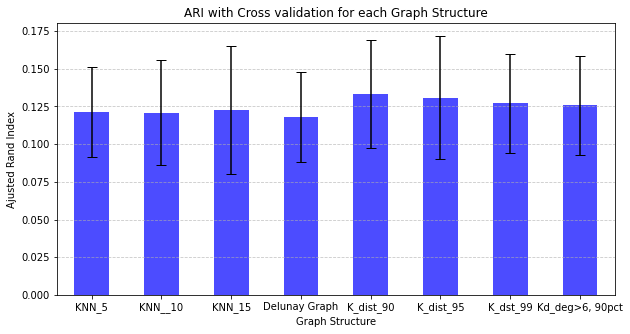

In [673]:
plot_mean_std(r_df_r)

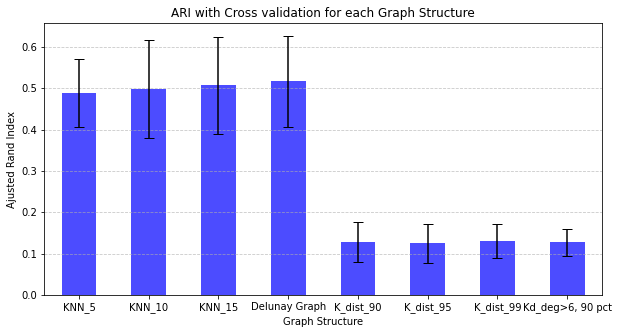

In [675]:
plot_mean_std(r_ind_df_r)

In [406]:
r_ind_df_r

,KNN_Graph_5,KNN_Graph_10,KNN_Graph_15,Delunay Graph,K_distance_90,K_distance_95,K_distance_99
0,0.435754,0.540197,0.281265,0.617844,0.083137,0.132244,0.099895
1,0.604544,0.566857,0.551090,0.507468,0.149588,0.130204,0.105516
2,0.321374,0.456538,0.318212,0.466294,0.046880,0.061433,0.101439
3,0.621955,0.359659,0.451205,0.686953,0.115173,0.080683,0.092130
4,0.644352,0.687729,0.528224,0.709671,0.184294,0.163682,0.186422
5,0.446189,0.385011,0.515429,0.453977,0.085713,0.088683,0.079212
6,0.441258,0.517781,0.421751,0.357099,0.120715,0.120337,0.130223
7,0.497120,0.377502,0.562524,0.538612,0.098432,0.098943,0.138269
8,0.407880,0.512668,0.222994,0.313527,0.136642,0.201757,0.157754
9,0.567491,0.644787,0.632790,0.598679,0.213937,0.157711,0.185463


In [666]:
r_ind_df_r.mean()

KNN_Graph_5      0.529317
KNN_Graph_10     0.524298
KNN_Graph_15     0.521609
Delunay Graph    0.509536
K_distance_90    0.137749
K_distance_95    0.132835
K_distance_99    0.122548
dtype: float64

In [672]:
r_df_r = pd.DataFrame(r_s, columns = ['KNN_5', 'KNN__10', 'KNN_15', 'Delunay Graph', 'K_dist_90', 'K_dist_95', 'K_dst_99','Kd_deg>6, 90pct'])

In [665]:
r_df_r.mean()

KNN_Graph_5                0.121377
KNN_Graph_10               0.120716
KNN_Graph_15               0.122624
Delunay Graph              0.118001
K_distance_90              0.133170
K_distance_95              0.130828
K_distance_99              0.126955
Kd_degree>6, 90 percent    0.125623
dtype: float64

In [664]:
r_df_r

,KNN_Graph_5,KNN_Graph_10,KNN_Graph_15,Delunay Graph,K_distance_90,K_distance_95,K_distance_99,"Kd_degree>6, 90 percent"
0,0.124217,0.094796,0.165139,0.126496,0.138553,0.154339,0.140753,0.152825
1,0.121931,0.103446,0.108735,0.124067,0.150429,0.128914,0.112490,0.128136
2,0.076729,0.081712,0.055483,0.102193,0.137344,0.040571,0.091484,0.094547
3,0.094007,0.068961,0.111350,0.096852,0.082510,0.086145,0.095312,0.106149
4,0.133287,0.169292,0.141001,0.121906,0.170105,0.142066,0.173000,0.121468
5,0.148558,0.133929,0.136047,0.154077,0.091684,0.078488,0.100368,0.132818
6,0.177025,0.162152,0.155936,0.150009,0.209952,0.178308,0.167967,0.143953
7,0.109548,0.100464,0.086157,0.080655,0.106396,0.123295,0.102928,0.103332
8,0.119679,0.160310,0.193362,0.122329,0.120562,0.152155,0.151996,0.177697
9,0.183565,0.187403,0.193779,0.180017,0.153556,0.165441,0.128812,0.161045


In [669]:
r_ind_df_r.mean()

KNN_Graph_5                0.488300
KNN_Graph_10               0.498686
KNN_Graph_15               0.507239
Delunay Graph              0.516522
K_distance_90              0.128029
K_distance_95              0.124599
K_distance_99              0.130421
Kd_degree>6, 90 percent    0.126834
dtype: float64

In [674]:
r_ind_df_r = pd.DataFrame(rand_sc, columns = ['KNN_5', 'KNN_10', 'KNN_15', 'Delunay Graph', 'K_dist_90', 'K_dist_95', 'K_dist_99', 'Kd_deg>6, 90 pct'])

In [339]:
rand_sc

[[0.4357540808323061,
  0.5401974110161326,
  0.2812646840406292,
  0.6178442704942062,
  0.08313737731595996,
  0.1322441838295177,
  0.09989458441172358],
 [0.6045444783545928,
  0.5668567819794583,
  0.5510900069870222,
  0.5074677715049896,
  0.14958819692279854,
  0.13020384417429445,
  0.10551647530839729],
 [0.32137440706363757,
  0.456537958649751,
  0.3182115706892661,
  0.4662943978886666,
  0.04688026750624997,
  0.06143289685688693,
  0.10143936927800766],
 [0.6219553424372776,
  0.35965942187899363,
  0.45120521326597435,
  0.6869529601409807,
  0.11517278273802582,
  0.08068270972112328,
  0.09212976547712783],
 [0.6443522703020472,
  0.6877290110259859,
  0.5282242117908258,
  0.7096710327027579,
  0.1842935894153966,
  0.16368204843562525,
  0.18642222779607975],
 [0.4461886126700487,
  0.3850107763272483,
  0.5154286123389216,
  0.4539770536338267,
  0.08571285043883047,
  0.08868345726955827,
  0.07921202151352634],
 [0.4412581358859621,
  0.5177814705840313,
  0.4217

In [659]:
r_ind_df = pd.DataFrame(r_s, columns = ['KNN_Graph_5', 'KNN_Graph_10', 'KNN_Graph_15', 'Delunay Graph', 'K_distance_90', 'K_distance_95', 'K_distance_99','Kd_degree>6'])

In [660]:
r_ind_df

,KNN_Graph_5,KNN_Graph_10,KNN_Graph_15,Delunay Graph,K_distance_90,K_distance_95,K_distance_99,Kd_degree>6
0,0.124217,0.094796,0.165139,0.126496,0.138553,0.154339,0.140753,0.152825
1,0.121931,0.103446,0.108735,0.124067,0.150429,0.128914,0.112490,0.128136
2,0.076729,0.081712,0.055483,0.102193,0.137344,0.040571,0.091484,0.094547
3,0.094007,0.068961,0.111350,0.096852,0.082510,0.086145,0.095312,0.106149
4,0.133287,0.169292,0.141001,0.121906,0.170105,0.142066,0.173000,0.121468
5,0.148558,0.133929,0.136047,0.154077,0.091684,0.078488,0.100368,0.132818
6,0.177025,0.162152,0.155936,0.150009,0.209952,0.178308,0.167967,0.143953
7,0.109548,0.100464,0.086157,0.080655,0.106396,0.123295,0.102928,0.103332
8,0.119679,0.160310,0.193362,0.122329,0.120562,0.152155,0.151996,0.177697
9,0.183565,0.187403,0.193779,0.180017,0.153556,0.165441,0.128812,0.161045


In [661]:
r_ind_df.mean(axis=0)


KNN_Graph_5      0.121377
KNN_Graph_10     0.120716
KNN_Graph_15     0.122624
Delunay Graph    0.118001
K_distance_90    0.133170
K_distance_95    0.130828
K_distance_99    0.126955
Kd_degree>6      0.125623
dtype: float64

In [277]:
r_ind_df.mean(axis=0)


KNN_Graph_5      0.339129
KNN_Graph_10     0.342073
KNN_Graph_15     0.350125
Delunay Graph    0.351036
K_distance_90    0.331434
K_distance_95    0.336815
K_distance_99    0.357556
dtype: float64

In [662]:
avg_clust

[[0.5820329340583958,
  0.6668713368071407,
  0.7166530053603246,
  0.44022731169721835,
  0.6067297336097894,
  0.6562897188225637,
  0.6947149407438794,
  0.7378024076864904],
 [0.5828926038500514,
  0.6714328408309356,
  0.7257720026369273,
  0.4436872937936743,
  0.631687548009664,
  0.644361742509419,
  0.7238013588696389,
  0.7374751888959342],
 [0.5698376539933971,
  0.6574888002034996,
  0.7144949418554073,
  0.44087371978659534,
  0.6087750494110342,
  0.632446353244405,
  0.7036892585507745,
  0.733192577814381],
 [0.5709387079529566,
  0.6626484483314165,
  0.7228652512642358,
  0.4394892672094717,
  0.6051290993858274,
  0.6531757594927889,
  0.7243804033236799,
  0.7440829049316888],
 [0.590443121693122,
  0.706556625476475,
  0.7633461624934293,
  0.44396934512675273,
  0.6150173134797231,
  0.6671131821761668,
  0.7239861920206258,
  0.7759297376590072],
 [0.5860259965728722,
  0.671045654080788,
  0.7343503574148659,
  0.4410264372622295,
  0.6335109193492037,
  0.65857

In [332]:
rndm_p

[-0.004364780984297646,
 0.001314075213026313,
 -0.0016277207853783444,
 -0.002754454537996828,
 0.00273349051944182,
 0.0007738728281026927,
 -0.002903223260883796,
 0.010019603154354673,
 0.0026997931812348256,
 0.0007015394938588719,
 0.0020422423116320475,
 -0.001347637982022387,
 -0.0065891157409980515,
 -0.0013650946101080477]

In [273]:
r_ind_df

,KNN_Graph_5,KNN_Graph_10,KNN_Graph_15,Delunay Graph,K_distance_90,K_distance_95,K_distance_99
0,0.298514,0.281613,0.329844,0.280824,0.290305,0.304013,0.344310
1,0.324505,0.324505,0.323965,0.358569,0.307335,0.305890,0.327332
2,0.339187,0.345488,0.345488,0.410639,0.331979,0.337447,0.363999
3,0.424392,0.424392,0.424392,0.422771,0.362007,0.379406,0.386640
4,0.368842,0.369980,0.368842,0.363884,0.378203,0.371534,0.389088
5,0.298316,0.341680,0.342730,0.292507,0.322964,0.314633,0.330754
6,0.359353,0.359353,0.420230,0.420913,0.404517,0.431135,0.432487
7,0.315795,0.343369,0.315795,0.345309,0.306610,0.314786,0.334150
8,0.331276,0.299581,0.298860,0.301794,0.320377,0.328718,0.353184
9,0.331107,0.330770,0.331107,0.313153,0.290039,0.280588,0.313612


In [216]:
df['cell type'][]

0      3
1      3
2      3
3      3
4      3
      ..
709    6
710    6
711    6
712    6
713    6
Name: cell type, Length: 714, dtype: int64

In [158]:
type(df_nodes)

0      3
1      2
2      2
6      3
3      3
      ..
652    3
655    3
653    3
656    3
654    3
Name: gene, Length: 642, dtype: int64

In [385]:
sim_data[i]['gene'].unique()

array([3, 4, 2, 1, 5])

In [28]:
from sklearn.neighbors import KDTree

In [587]:
df = sim_data[1][['x','y']]

In [590]:
kd = KDTree(df)

In [600]:
dst,vt = kd.query(df, k=12)

In [614]:
dst[:,6]

array([ 18.06834346,  14.41727692,  13.26009561,  13.7899212 ,
        20.0883445 ,  15.38513604,  17.25959818,  17.10115262,
        19.71042019,  17.32119753,  13.70930052,  13.89787941,
        13.7899212 ,  12.72248264,  22.53888764,  22.11435536,
        15.20666398,  14.09126839,  18.01799356,  14.28287044,
        18.84584924,  13.36305753,  11.09084252,  13.21517224,
        15.35050896,  15.66979061,  19.17796803,  19.53980753,
        18.12759741,  15.07005644,  14.22746487,  13.6738582 ,
        11.42374742,  18.80696007,  15.63954561,  16.82869668,
        14.96510174,  14.42495496,  14.42495496,  15.28979889,
        17.88535486,  22.94949916,  14.90686974,  17.39930802,
        13.07667664,  12.79630324,  14.28287044,  19.92322488,
        18.08531563,  13.48490556,  18.66182651,  11.46182333,
        14.96435652,  15.19777215,  19.09269617,  21.03503219,
        13.73498077,  14.90686974,  12.82537009,  18.08864351,
        15.53808767,  22.50237383,  15.02583303,  19.57

In [597]:
print(len(dst[0]))

711


In [606]:
vt[3]

array([  3,   5,  13,  22,   4, 684,  12,  11,  25, 683,  23,   2])

In [610]:
dst[:,1]

array([  5.8792962 ,   5.99530782,   4.54862557,   5.62075102,
         7.52686793,   5.62075102,   7.98416551,   6.38961322,
         4.52758641,   2.78408767,   6.82529012,   9.85882322,
         2.90715834,   5.03944272,   4.06002219,   7.98416551,
         4.21051486,   3.38372413,   4.52758641,   5.86053052,
         2.78408767,   7.4583116 ,   2.90715834,   5.14888024,
         6.75786042,   6.75786042,   4.06002219,   2.95250365,
        11.04553561,   8.65899849,   8.47540653,   5.86053052,
         6.6006518 ,   7.64289314,   8.18682506,   0.82833435,
         5.14888024,   6.91207571,   8.64206262,  10.16301486,
         2.95250365,   8.79252149,   5.51668915,   5.51668915,
         1.13225757,   1.13225757,   7.84408559,   7.64289314,
         8.18682506,   7.52648355,   6.61416334,   6.9119853 ,
         2.61547617,   2.61547617,   2.17270678,   2.17270678,
         3.82912382,   2.94895313,   5.32862998,   3.51359967,
         3.51359967,   8.29163932,   6.24914633,  10.02

In [623]:
#K-radius distance
def kd_graph(df,xy,pct):
    spots = xy
    kdtree = KDTree(spots)
    distances, _ =  kdtree.query(spots, k=10)
    d_max = np.percentile(distances[:,1], pct)
    kdtree = KDTree(spots)
    ind = kdtree.query_radius(spots, d_max)
    df_edge = pd.DataFrame(
    data=[(spots.index[i], spots.index[j]) for i in range(len(spots)) for j in ind[i] if i < j], 
    columns=['source', 'target'])
    #df_edge = df_edge.set_index('{}_'.format() + df_edge.index.astype(str))
    #df_edges = pd.concat(df_edge.values())
    #df_edges = df_edges.reset_index()

    # remove components
    g = nx.from_pandas_edgelist(df_edge)
    n_cc = 6
    for cc in nx.connected_components(g.copy()):
        if len(cc) < n_cc:
            g.remove_nodes_from(cc)
    #print(g.number_of_nodes())
    #print(g.number_of_edges() / g.number_of_nodes() * 2)
    df_edges = nx.to_pandas_edgelist(g)
    df_nodes = df.loc[list(g.nodes), 'Gene']
    df_ct = df.loc[list(g.nodes),'CellType']
    df_x = df.loc[list(g.nodes),'X']
    df_y = df.loc[list(g.nodes),'Y']
    

    return df_nodes, df_edges, df_ct, df_x, df_y

In [656]:
#Modified for having the graph with 90 percent of the graph connected to at least more than 5 neighbors
def kd_degree_graph(df,xy):
    degree = 5
    spots = xy
    pct = 90
    kdtree = KDTree(spots)
    distances, _ =  kdtree.query(spots, k=12)
    d_max = np.percentile(distances[:,degree], pct)
    kdtree = KDTree(spots)
    ind = kdtree.query_radius(spots, d_max)
    df_edge = pd.DataFrame(
    data=[(spots.index[i], spots.index[j]) for i in range(len(spots)) for j in ind[i] if i < j], 
    columns=['source', 'target'])
    #df_edge = df_edge.set_index('{}_'.format() + df_edge.index.astype(str))
    #df_edges = pd.concat(df_edge.values())
    #df_edges = df_edges.reset_index()

    # remove components
    g = nx.from_pandas_edgelist(df_edge)
    n_cc = 6
    for cc in nx.connected_components(g.copy()):
        if len(cc) < n_cc:
            g.remove_nodes_from(cc)
    #print(g.number_of_nodes())
    #print(g.number_of_edges() / g.number_of_nodes() * 2)
    df_edges = nx.to_pandas_edgelist(g)
    df_nodes = df.loc[list(g.nodes), 'Gene']
    df_ct = df.loc[list(g.nodes),'CellType']
    df_x = df.loc[list(g.nodes),'X']
    df_y = df.loc[list(g.nodes),'Y']
    

    return df_nodes, df_edges, df_ct, df_x, df_y

In [615]:

def kd_graph(df,xy,pct):
    spots = xy
    kdtree = KDTree(spots)
    distances, _ =  kdtree.query(spots, k=10)
    d_max = np.percentile(distances[:,1], pct)
    kdtree = KDTree(spots)
    ind = kdtree.query_radius(spots, d_max)
    df_edge = pd.DataFrame(
    data=[(spots.index[i], spots.index[j]) for i in range(len(spots)) for j in ind[i] if i < j], 
    columns=['source', 'target'])
    #df_edge = df_edge.set_index('{}_'.format() + df_edge.index.astype(str))
    #df_edges = pd.concat(df_edge.values())
    #df_edges = df_edges.reset_index()

    # remove components
    g = nx.from_pandas_edgelist(df_edge)
    n_cc = 6
    for cc in nx.connected_components(g.copy()):
        if len(cc) < n_cc:
            g.remove_nodes_from(cc)
    #print(g.number_of_nodes())
    #print(g.number_of_edges() / g.number_of_nodes() * 2)
    df_edges = nx.to_pandas_edgelist(g)
    df_nodes = df.loc[list(g.nodes), 'Gene']
    df_ct = df.loc[list(g.nodes),'CellType']
    df_x = df.loc[list(g.nodes),'X']
    df_y = df.loc[list(g.nodes),'Y']
    

    return df_nodes, df_edges, df_ct, df_x, df_y

In [214]:
rng = np.random.default_rng()
rng.permutation(10)

array([4, 5, 3, 2, 6, 8, 9, 1, 7, 0])

In [347]:
print(df_edges)

      source  target
0        714     724
1        714     734
2        714     723
3        724     715
4        724     716
...      ...     ...
1012    1392    1390
1013    1392    1393
1014    1381    1388
1015    1389    1384
1016    1390    1393

[1017 rows x 2 columns]


In [204]:
d_max = np.percentile(distances[:,1], pct)

In [187]:
spots = df[['X', 'Y']]
kdtree = KDTree(spots)
ind = kdtree.query_radius(spots, d_max)
df_edge = pd.DataFrame(
data=[(spots.index[i], spots.index[j]) for i in range(len(spots)) for j in ind[i] if i < j], 
columns=['source', 'target'])
#df_edge = df_edge.set_index('{}_'.format() + df_edge.index.astype(str))
#df_edges = pd.concat(df_edge.values())
#df_edges = df_edges.reset_index()

# remove components
g = nx.from_pandas_edgelist(df_edges)
n_cc = 6
print(n_cc)
for cc in nx.connected_components(g.copy()):
    if len(cc) < n_cc:
        g.remove_nodes_from(cc)
print(g.number_of_nodes())
print(g.number_of_edges() / g.number_of_nodes() * 2)

6
778
5.938303341902314


In [188]:
df_edges = nx.to_pandas_edgelist(g)

In [182]:
len(sim_data[0]['cell'].unique())

26

In [26]:
#Delunay graph creation
def Delunay_graph(xy):
    tri = Delaunay(xy)
    lists=tri.simplices

#Delunay tries to edge list
    edge_list = []
    first_entries = []
    second_entries = []
    # Iterate through each list
    for lst in lists:
        # Iterate through the vertices in the current list
        for i in range(len(lst)):
            # Create edges between all pairs of vertices
            for j in range(i + 1, len(lst)):
                first_entries.append(lst[i])
                second_entries.append(lst[j])
    df_edges = pd.DataFrame({'source': first_entries, 'target': second_entries})
    return df_edges


In [10]:
#KNN Graph Creation
def knn_graph(xy_arr,k_p):
    A = kneighbors_graph(xy, n_neighbors=k_p, include_self=True)
    source, target = A.nonzero()
    df_edges = pd.DataFrame({'source': source, 'target': target})
    return df_edges

In [175]:
#node2vec
def n2vec_comp(df_nodes, df_edges):
    model = Node2Vec(
        data.edge_index,
        embedding_dim=128,
        walk_length=20,
        context_size=10,
        walks_per_node=10,
        num_negative_samples=1,
        p=1,
        q=1,
        sparse=True,
    ).to(device)
    
    optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)
    
    

In [193]:
df_cell = create_gene_cell_dataframe(sim_data[0]['gene'], sim_data[0]['cell'])

In [204]:
df_cell

,1,2,3,4,5
0,0,28,0,0,0
1,0,0,27,0,0
2,0,13,14,0,0
3,13,14,0,0,0
4,0,13,4,4,0
5,0,28,0,0,0
6,0,0,27,0,0
7,0,9,7,0,0
8,10,20,0,0,0
9,0,11,12,7,0


In [202]:
generate_random_cell_from_dataframe(df_cell, 3)

19

In [203]:
df_cell[1].value_counts()

1
0     21
13     2
10     1
18     1
14     1
Name: count, dtype: int64

In [209]:
df_cell[(df_cell.select_dtypes(include=[1]) != 0).any()]

TypeError: Cannot interpret '1' as a data type

In [212]:
df_cell

,1,2,3,4,5
0,0,28,0,0,0
1,0,0,27,0,0
2,0,13,14,0,0
3,13,14,0,0,0
4,0,13,4,4,0
5,0,28,0,0,0
6,0,0,27,0,0
7,0,9,7,0,0
8,10,20,0,0,0
9,0,11,12,7,0


In [205]:
#counts GNN parameters for different models
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [192]:
#gives random probably of chosen cell types
def generate_random_cell_from_dataframe(dataframe, gene_column):
    gene_counts = dataframe[gene_column].value_counts()
    nonzero_cells = gene_counts.index
    
    if len(nonzero_cells) == 0:
        raise ValueError("No nonzero cells associated with the given gene.")
    
    probabilities = gene_counts / gene_counts.sum()
    
    chosen_cell = np.random.choice(nonzero_cells, p=probabilities)
    return chosen_cell

In [188]:
#creates a matrix
def create_gene_cell_dataframe(gene_array, cell_array):
    genes = list(set(gene_array))  # Get unique gene names
    cells = list(set(cell_array))  # Get unique cell names
    
    gene_to_index = {gene: index for index, gene in enumerate(genes)}
    cell_to_index = {cell: index for index, cell in enumerate(cells)}
    
    matrix = [[0] * len(genes) for _ in range(len(cells))]  # Initialize the matrix
    
    for gene, cell in zip(gene_array, cell_array):
        gene_index = gene_to_index[gene]
        cell_index = cell_to_index[cell]
        matrix[cell_index][gene_index] += 1
        
    data = pd.DataFrame(matrix, index=cells, columns=genes)
    return data

In [405]:
#dummy classifier, 
#for each cell type get the most common gene products
#for each gene product reclassify the cell type.
#Input: gene products with type of cell for each
#Output: classification array with cell types 
def random_clf(gene_array, cell_array):
    cell_pred =[]
    df = create_gene_cell_dataframe(gene_array, cell_array)
    for i in range(0,len(gene_array)):
        cell_pred.append(generate_random_cell_from_dataframe(dataframe, gene_column))
    

In [85]:
def PGNN_comp(df_nodes, df_edges):
    # create pytorch geometric Data
    #print(index_dict)
    df_edges_index = df_edges[['source', 'target']].applymap(index_dict.get)
    #print(df_edges_index)
    #print(df_nodes)
    x = torch.tensor(df_nodes.to_numpy(), dtype=torch.float)
    edge_index = torch.tensor(df_edges_index.to_numpy(), dtype=torch.long)
    data = Data(x=x, edge_index=edge_index)
    #print(data)
    #print(data.num_edges / data.num_nodes)

    # hyperparameters
    num_samples = [-1, -1] # number of samples in each layer
    batch_size = 64
    hidden_channels = 32
    walk_length = 1
    num_neg_samples = 1
    epochs = 10
    disable = True

    subgraph_loader = NeighborSampler(
        data.edge_index, node_idx=None, 
        sizes=[-1], batch_size=batch_size, shuffle=False, 
        num_workers=0)
    
    
    class PGNN_layer(nn.Module):
        def __init__(self, input_dim, output_dim,dist_trainable=True):
            super(PGNN_layer, self).__init__()
            self.input_dim = input_dim
            self.dist_trainable = dist_trainable

            if self.dist_trainable:
                self.dist_compute = Nonlinear(1, output_dim, 1)

            self.linear_hidden = nn.Linear(input_dim*2, output_dim)
            self.linear_out_position = nn.Linear(output_dim,1)
            self.act = nn.ReLU()

            for m in self.modules():
                if isinstance(m, nn.Linear):
                    m.weight.data = init.xavier_uniform_(m.weight.data, gain=nn.init.calculate_gain('relu'))
                    if m.bias is not None:
                        m.bias.data = init.constant_(m.bias.data, 0.0)

        def forward(self, feature, dists_max, dists_argmax):
            if self.dist_trainable:
                dists_max = self.dist_compute(dists_max.unsqueeze(-1)).squeeze()

            subset_features = feature[dists_argmax.flatten(), :]
            subset_features = subset_features.reshape((dists_argmax.shape[0], dists_argmax.shape[1],
                                                       feature.shape[1]))
            messages = subset_features * dists_max.unsqueeze(-1)

            self_feature = feature.unsqueeze(1).repeat(1, dists_max.shape[1], 1)
            messages = torch.cat((messages, self_feature), dim=-1)

            messages = self.linear_hidden(messages).squeeze()
            messages = self.act(messages) # n*m*d

            out_position = self.linear_out_position(messages).squeeze(-1)  # n*m_out
            out_structure = torch.mean(messages, dim=1)  # n*d

            return out_position, out_structure


### Non linearity
    class Nonlinear(nn.Module):
        def __init__(self, input_dim, hidden_dim, output_dim):
            super(Nonlinear, self).__init__()

            self.linear1 = nn.Linear(input_dim, hidden_dim)
            self.linear2 = nn.Linear(hidden_dim, output_dim)

            self.act = nn.ReLU()

            for m in self.modules():
                if isinstance(m, nn.Linear):
                    m.weight.data = init.xavier_uniform_(m.weight.data, gain=nn.init.calculate_gain('relu'))
                    if m.bias is not None:
                        m.bias.data = init.constant_(m.bias.data, 0.0)

        def forward(self, x):
            x = self.linear1(x)
            x = self.act(x)
            x = self.linear2(x)
            return x

    
    class PGNN(torch.nn.Module):
        def __init__(self, input_dim, feature_dim, hidden_dim, output_dim,
                     feature_pre=True, layer_num=2, dropout=True, **kwargs):
            super(PGNN, self).__init__()
            self.feature_pre = feature_pre
            self.layer_num = layer_num
            self.dropout = dropout
            if layer_num == 1:
                hidden_dim = output_dim
            if feature_pre:
                self.linear_pre = nn.Linear(input_dim, feature_dim)
                self.conv_first = PGNN_layer(feature_dim, hidden_dim)
            else:
                self.conv_first = PGNN_layer(input_dim, hidden_dim)
            if layer_num>1:
                self.conv_hidden = nn.ModuleList([PGNN_layer(hidden_dim, hidden_dim) for i in range(layer_num - 2)])
                self.conv_out = PGNN_layer(hidden_dim, output_dim)

        def forward(self, data):
            x = data.x
            if self.feature_pre:
                x = self.linear_pre(x)
            x_position, x = self.conv_first(x, data.dists_max, data.dists_argmax)
            if self.layer_num == 1:
                return x_position
            # x = F.relu(x) # Note: optional!
            if self.dropout:
                x = F.dropout(x, training=self.training)
            for i in range(self.layer_num-2):
                _, x = self.conv_hidden[i](x, data.dists_max, data.dists_argmax)
                # x = F.relu(x) # Note: optional!
                if self.dropout:
                    x = F.dropout(x, training=self.training)
            x_position, x = self.conv_out(x, data.dists_max, data.dists_argmax)
            x_position = F.normalize(x_position, p=2, dim=-1)
            return x_position
        
        def inference(self, x_all):
            pbar = tqdm(total=x_all.size(0) * self.num_layers, disable=disable)
            pbar.set_description('Evaluating')
            # Compute representations of nodes layer by layer, using *all*
            # available edges. This leads to faster computation in contrast to
            # immediately computing the final representations of each batch.
            for i in range(self.layer_num):
                xs = []
                for batch_size, n_id, adj in subgraph_loader:
                    edge_index, _, size = adj.to(device)
                    x = x_all[n_id].to(device)
                    x_target = x[:size[1]]
                    x = self.conv_hidden[i]((x, x_target), edge_index)
                    if i != self.layer_num - 1:
                        x = F.relu(x)
                    xs.append(x.cpu())
                    pbar.update(batch_size)
                x_all = torch.cat(xs, dim=0)
            pbar.close()
            
            return x_all
    #Training Model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = SAGE(data.num_node_features, hidden_channels).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    x = data.x.to(device)


    def train(epoch):
        model.train()

        pbar = tqdm(total=data.num_nodes, disable=disable)
        pbar.set_description(f'Epoch {epoch:02d}')

        total_loss = 0

        node_idx = torch.randperm(data.num_nodes)
        train_loader = NeighborSampler(
            data.edge_index, node_idx=node_idx, 
            sizes=num_samples, batch_size=batch_size, shuffle=False,
            num_workers=0
        )

        # positive sampling
        rw = random_walk(data.edge_index[0], data.edge_index[1], node_idx, walk_length=walk_length)
        rw_idx = rw[:,1:].flatten()
        pos_loader = NeighborSampler(
            data.edge_index, node_idx=rw_idx, 
            sizes=num_samples, batch_size=batch_size * walk_length, shuffle=False,
            num_workers=0
        )

        # negative sampling
        deg = degree(data.edge_index[0])
        distribution = deg ** 0.75
        neg_idx = torch.multinomial(
            distribution, data.num_nodes * num_neg_samples, replacement=True)
        neg_loader = NeighborSampler(
            data.edge_index, node_idx=neg_idx,
            sizes=num_samples, batch_size=batch_size * num_neg_samples,
            shuffle=True, num_workers=0)

        for (batch_size_, u_id, adjs_u), (_, v_id, adjs_v), (_, vn_id, adjs_vn) in zip(train_loader, pos_loader, neg_loader):

            adjs_u = [adj.to(device) for adj in adjs_u]
            z_u = model(x[u_id], adjs_u)

            adjs_v = [adj.to(device) for adj in adjs_v]
            z_v = model(x[v_id], adjs_v)

            adjs_vn = [adj.to(device) for adj in adjs_vn]
            z_vn = model(x[vn_id], adjs_vn)

            optimizer.zero_grad()
            pos_loss = -F.logsigmoid(
                (z_u.repeat_interleave(walk_length, dim=0)*z_v) \
                .sum(dim=1)).mean()
            neg_loss = -F.logsigmoid(
                -(z_u.repeat_interleave(num_neg_samples, dim=0)*z_vn) \
                .sum(dim=1)).mean()
            loss = pos_loss + neg_loss
            loss.backward()
            optimizer.step()

            total_loss += float(loss)
            pbar.update(batch_size_)

        pbar.close()

        loss = total_loss / len(train_loader)

        return loss


    for epoch in range(1, epochs + 1):
        gc.collect()
        loss = train(epoch)
        print(f'Epoch {epoch:02d}, Loss: {loss:.4f}')

    model_dir = os.path.join(os.getcwd(), 'models')
    #os.makedirs(model_dir, exist_ok=True)
    #model_name = os.path.join(model_dir, time.strftime('sage-rw-%Y%m%d.pt'))
    #torch.save(model, model_name)
    #model = torch.load(model_name)

    gc.collect()
    model.eval()
    z = model.inference(x)
    node_embeddings = z.detach().cpu().numpy()
    return node_embeddings
    


In [147]:
def GNN_compute(df_nodes, df_edges):
    # create pytorch geometric Data
    #df_nodes.reset_index()
    index_dict = dict(zip(df_nodes.index, range(len(df_nodes))))
    df_edges_index = df_edges[['source', 'target']].applymap(index_dict.get)
    #print(df_edges_index)
    #print(df_nodes)
    x = torch.tensor(df_nodes.to_numpy(), dtype=torch.float)
    edge_index = torch.tensor(df_edges_index.to_numpy(), dtype=torch.long)
    #edge_index = to_undirected(edge_index.t().contiguous())
    #print(edge_index)
    data = Data(x=x, edge_index=edge_index)
    #print(data.num_edges / data.num_nodes)

    # hyperparameters
    num_samples = [-1, -1] # number of samples in each layer
    batch_size = 64
    hidden_channels = 32
    walk_length = 1
    num_neg_samples = 1
    epochs = 10
    disable = True

    subgraph_loader = NeighborSampler(
        data.edge_index, node_idx=None, 
        sizes=[-1], batch_size=batch_size, shuffle=False, 
        num_workers=0)


    class SAGE(nn.Module):
        def __init__(self, in_channels, hidden_channels):
            super(SAGE, self).__init__()
            self.num_layers = 2
            self.convs = nn.ModuleList()
            self.convs.append(SAGEConv(in_channels, hidden_channels, normalize=True))
            self.convs.append(SAGEConv(hidden_channels, hidden_channels, normalize=True))

        def forward(self, x, adjs):
            # `train_loader` computes the k-hop neighborhood of a batch of nodes,
            # and returns, for each layer, a bipartite graph object, holding the
            # bipartite edges `edge_index`, the index `e_id` of the original edges,
            # and the size/shape `size` of the bipartite graph.
            # Target nodes are also included in the source nodes so that one can
            # easily apply skip-connections or add self-loops.
            for i, (edge_index, _, size) in enumerate(adjs):
                x_target = x[:size[1]]  # Target nodes are always placed first.
                x = self.convs[i]((x, x_target), edge_index)
                if i != self.num_layers - 1:
                    x = F.relu(x)
            return x

        def inference(self, x_all):
            pbar = tqdm(total=x_all.size(0) * self.num_layers, disable=disable)
            pbar.set_description('Evaluating')
            # Compute representations of nodes layer by layer, using *all*
            # available edges. This leads to faster computation in contrast to
            # immediately computing the final representations of each batch.
            for i in range(self.num_layers):
                xs = []
                for batch_size, n_id, adj in subgraph_loader:
                    edge_index, _, size = adj.to(device)
                    x = x_all[n_id].to(device)
                    x_target = x[:size[1]]
                    x = self.convs[i]((x, x_target), edge_index)
                    if i != self.num_layers - 1:
                        x = F.relu(x)
                    xs.append(x.cpu())
                    pbar.update(batch_size)
                x_all = torch.cat(xs, dim=0)
            pbar.close()
            return x_all



    #Training Model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = SAGE(data.num_node_features, hidden_channels).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    x = data.x.to(device)


    def train(epoch):
        model.train()

        pbar = tqdm(total=data.num_nodes, disable=disable)
        pbar.set_description(f'Epoch {epoch:02d}')

        total_loss = 0

        node_idx = torch.randperm(data.num_nodes)
        train_loader = NeighborSampler(
            data.edge_index, node_idx=node_idx, 
            sizes=num_samples, batch_size=batch_size, shuffle=False,
            num_workers=0
        )

        # positive sampling
        rw = random_walk(data.edge_index[0], data.edge_index[1], node_idx, walk_length=walk_length)
        rw_idx = rw[:,1:].flatten()
        pos_loader = NeighborSampler(
            data.edge_index, node_idx=rw_idx, 
            sizes=num_samples, batch_size=batch_size * walk_length, shuffle=False,
            num_workers=0
        )

        # negative sampling
        deg = degree(data.edge_index[0])
        distribution = deg ** 0.75
        neg_idx = torch.multinomial(
            distribution, data.num_nodes * num_neg_samples, replacement=True)
        neg_loader = NeighborSampler(
            data.edge_index, node_idx=neg_idx,
            sizes=num_samples, batch_size=batch_size * num_neg_samples,
            shuffle=True, num_workers=0)

        for (batch_size_, u_id, adjs_u), (_, v_id, adjs_v), (_, vn_id, adjs_vn) in zip(train_loader, pos_loader, neg_loader):

            adjs_u = [adj.to(device) for adj in adjs_u]
            z_u = model(x[u_id], adjs_u)

            adjs_v = [adj.to(device) for adj in adjs_v]
            z_v = model(x[v_id], adjs_v)

            adjs_vn = [adj.to(device) for adj in adjs_vn]
            z_vn = model(x[vn_id], adjs_vn)

            optimizer.zero_grad()
            pos_loss = -F.logsigmoid(
                (z_u.repeat_interleave(walk_length, dim=0)*z_v) \
                .sum(dim=1)).mean()
            neg_loss = -F.logsigmoid(
                -(z_u.repeat_interleave(num_neg_samples, dim=0)*z_vn) \
                .sum(dim=1)).mean()
            loss = pos_loss + neg_loss
            loss.backward()
            optimizer.step()

            total_loss += float(loss)
            pbar.update(batch_size_)

        pbar.close()

        loss = total_loss / len(train_loader)

        return loss


    for epoch in range(1, epochs + 1):
        gc.collect()
        loss = train(epoch)
        print(f'Epoch {epoch:02d}, Loss: {loss:.4f}')

    model_dir = os.path.join(os.getcwd(), 'models')
    #os.makedirs(model_dir, exist_ok=True)
    #model_name = os.path.join(model_dir, time.strftime('sage-rw-%Y%m%d.pt'))
    #torch.save(model, model_name)
    #model = torch.load(model_name)

    gc.collect()
    model.eval()
    z = model.inference(x)
    node_embeddings = z.detach().cpu().numpy()
    return node_embeddings

In [239]:
rw = random_walk(data.edge_index[0], data.edge_index[1], node_idx, walk_length=walk_length)
rw_idx = rw[:,1:].flatten()
pos_loader = NeighborSampler(data.edge_index, node_idx=rw_idx, sizes=num_samples, batch_size=batch_size * walk_length, shuffle=False,num_workers=0)

NameError: name 'data' is not defined

In [12]:
def compute_pred(df,n_emb):
    clusters = KMeans(n_clusters=n_emb).fit_predict(node_embeddings)
    df['Spage2vec'] = clusters
    df['Spage2vec'] = df['Spage2vec'].astype('category')
    df['Cell type'] = df['Cell type'].apply(lambda x: x[-1])
    df['Cell type'].astype('category')
    return df['Cell type'], df['Spage2vec']

In [149]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=6).fit_predict(node_embeddings)


NameError: name 'node_embeddings' is not defined

In [193]:
df['Spage2vec'] = clusters
df['Spage2vec'] = df['Spage2vec'].astype('category')

In [194]:
#df['Cell type'] =  df['Cell type'][-1]
df['Cell type'] = df['Cell type'].apply(lambda x: x[-1])
df['Cell type'].astype('category')

0      1
1      1
2      1
3      1
4      1
      ..
773    6
774    6
775    6
776    6
777    6
Name: Cell type, Length: 778, dtype: category
Categories (6, object): ['1', '2', '3', '4', '5', '6']

In [13]:
def confusion_mat(ar_a, ar_b):
    classes = sorted(list(set(ar_a + ar_b)))
    #classes = sorted(list(set(ar_a)))
    # Create confusion matrix
    num_classes = len(classes)
    cm = [[0] * num_classes for _ in range(num_classes)]

    # Fill confusion matrix
    for true_label, predicted_label in zip(ar_a, ar_b):
        true_index = classes.index(true_label)
        predicted_index = classes.index(predicted_label)
        cm[true_index][predicted_index] += 1
    return cm
    # Print confusion matrix
    print("Confusion Matrix:")
    for row in cm:
        print("\t".join(str(count) for count in row))

In [169]:
df_nodes

0      3
1      2
2      2
3      3
4      3
      ..
709    5
710    5
711    5
712    5
713    5
Name: gene, Length: 714, dtype: int64

In [42]:
#print(1-hamming_loss(df_nodes, rl))
f1_score(df_nodes, cl_s, average='micro')

NameError: name 'cl_s' is not defined

In [198]:
cl_s+=1

In [201]:
cl_s

0      3
1      3
2      3
3      3
4      3
      ..
709    1
710    4
711    1
712    2
713    4
Length: 714, dtype: int32

In [ ]:
cl_s = [y+1 for y in b]

In [190]:
rl = relabel(df_nodes,cl_s)

In [14]:
def relabel(a,b):
    #a = df['Cell type'].astype('int64').tolist()

    #b = df['Spage2vec'].tolist()
    b = [y+1 for y in b]

    #b = df['Spage2vec'].tolist()
    a = a.tolist()
    #b = b.tolist()
    cm = confusion_mat(a,b)

    from scipy.optimize import linear_sum_assignment
    a = pd.Series(a)
    b = pd.Series(b)
    cell_types = sorted(a.unique())
    spage2vec_labels = sorted(b.unique())
    if len(spage2vec_labels)>len(cell_types):
        cell_types = spage2vec_labels
    elif len(spage2vec_labels)<len(cell_types):
        spage2vec_labels = cell_types
    
    #print(cell_types)
    #print(spage2vec_labels)

    row_indices, col_indices = linear_sum_assignment(cm, maximize=True)
    print(row_indices)
    print(col_indices)
    # Create a dictionary to map old labels to new labels
    label_mapping = {
        spage2vec_labels[col_indices[j]]: cell_types[row_indices[j]]
        for j in range(len(row_indices))
    }
    print(label_mapping)

    b = b.map(label_mapping)
    return b

<Axes: xlabel='X', ylabel='Y'>

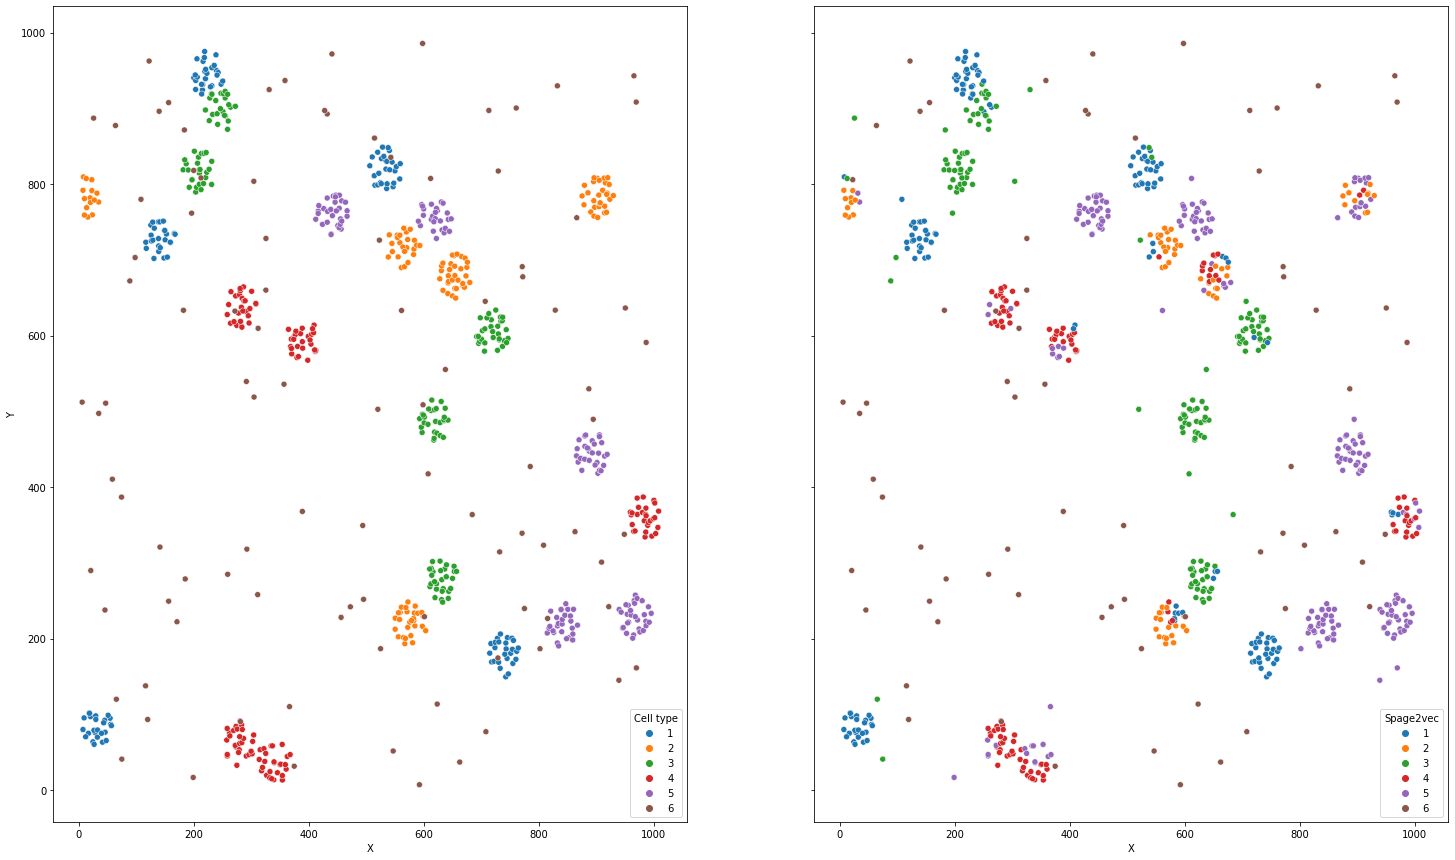

In [20]:
#KNN=5
import matplotlib.pyplot as plt
import seaborn as sns

category_order = ['1','2','3','4','5','6']

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(25,15))
sns.scatterplot(df, x='X', y='Y', hue='Cell type', ax=axs[0], hue_order=category_order)
sns.scatterplot(df, x='X', y='Y', hue='Spage2vec', ax=axs[1], hue_order=category_order)


0.8791773778920309

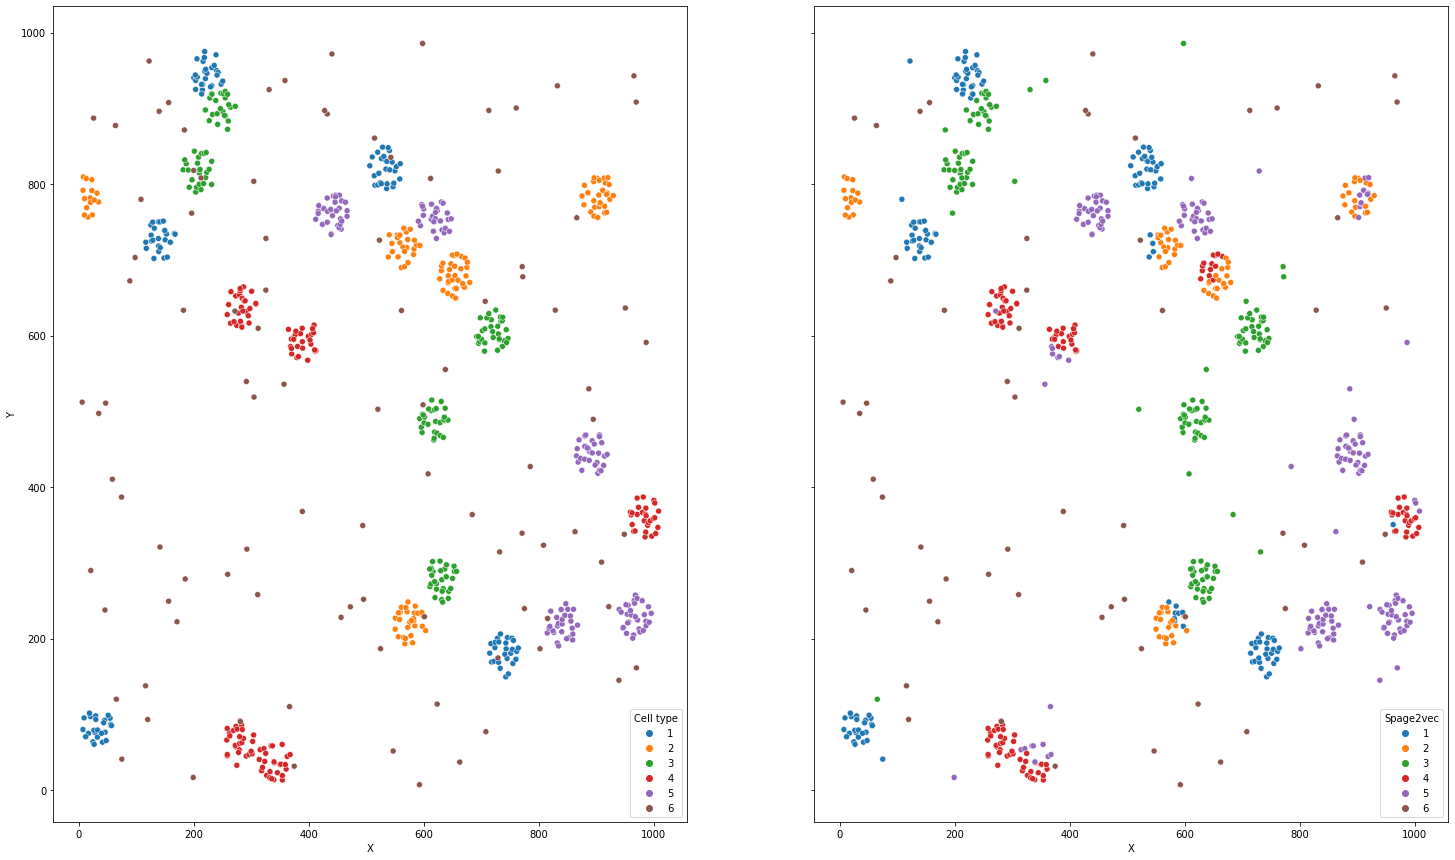

In [45]:
#KNN=10
category_order = ['1','2','3','4','5','6']

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(25,15))
sns.scatterplot(df, x='X', y='Y', hue='Cell type', ax=axs[0], hue_order=category_order)
sns.scatterplot(df, x='X', y='Y', hue='Spage2vec', ax=axs[1], hue_order=category_order)
1-hamming_loss(df['Cell type'], df['Spage2vec'])

0.7930591259640103

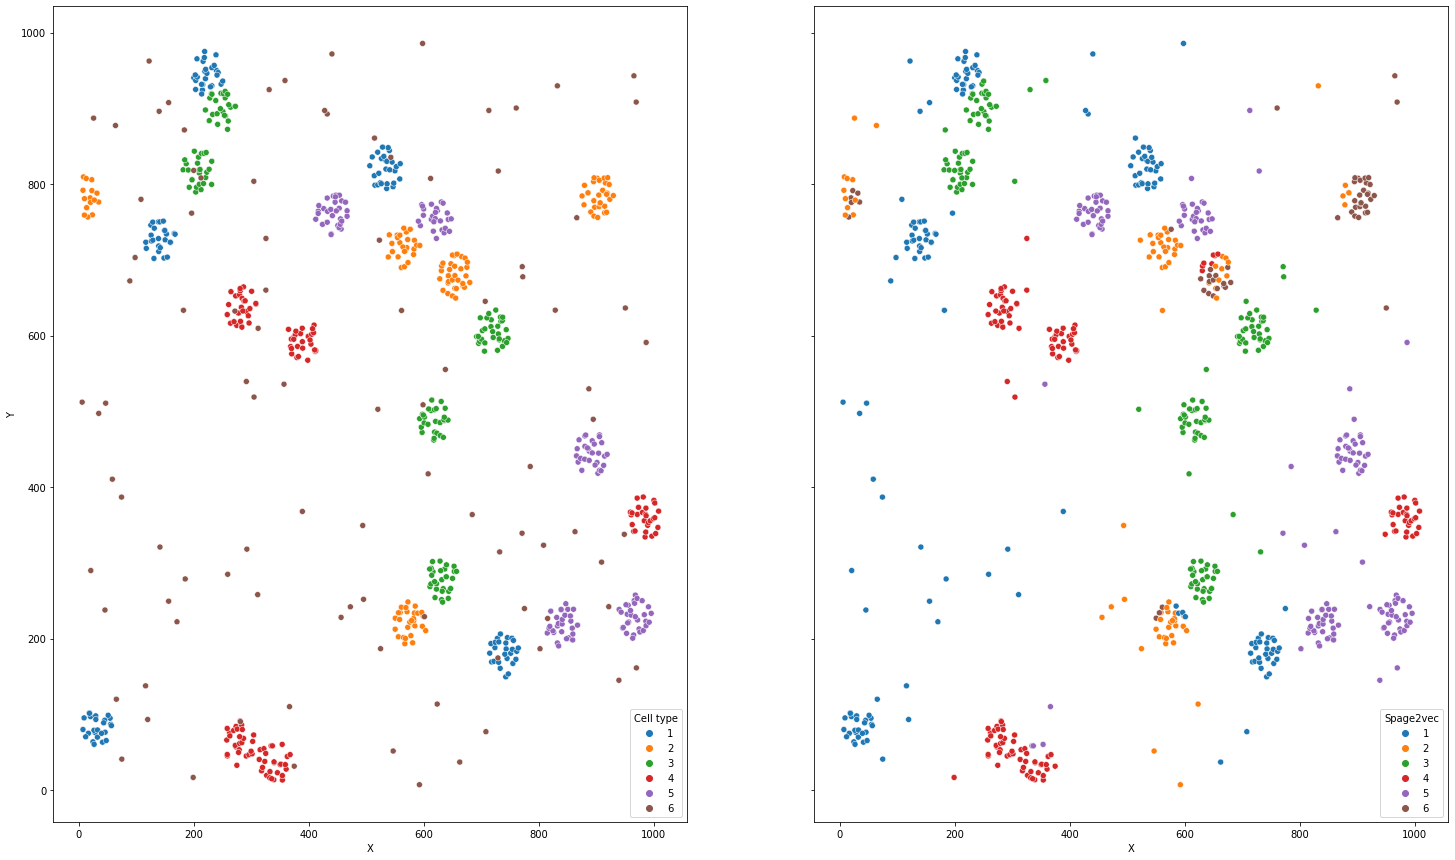

In [57]:
#KNN=15
category_order = ['1','2','3','4','5','6']

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(25,15))
sns.scatterplot(df, x='X', y='Y', hue='Cell type', ax=axs[0], hue_order=category_order)
sns.scatterplot(df, x='X', y='Y', hue='Spage2vec', ax=axs[1], hue_order=category_order)
1-hamming_loss(df['Cell type'], df['Spage2vec'])

0.8033419023136247

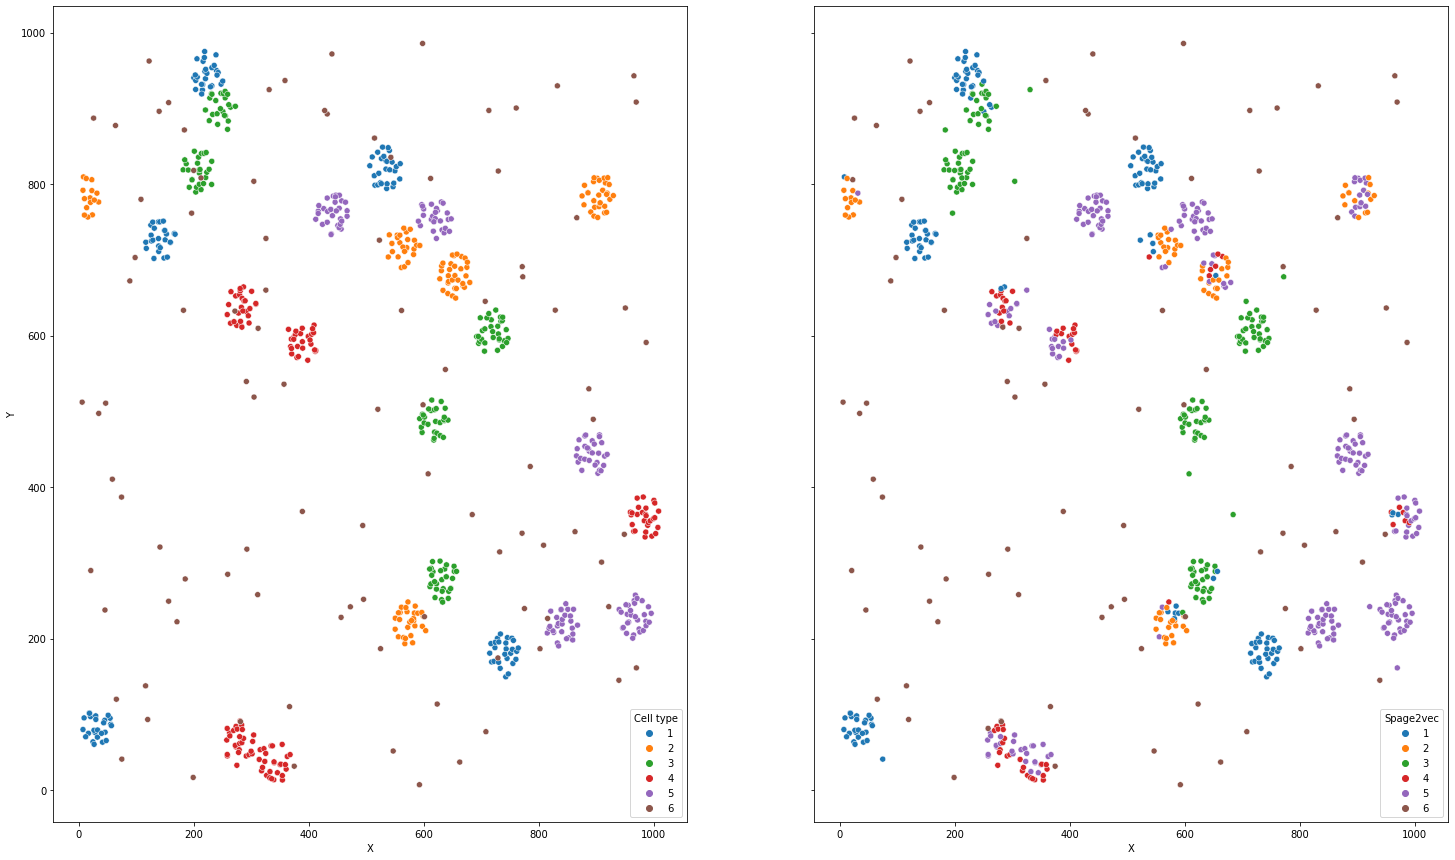

In [92]:
#Delunay 
category_order = ['1','2','3','4','5','6']

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(25,15))
sns.scatterplot(df, x='X', y='Y', hue='Cell type', ax=axs[0], hue_order=category_order)
sns.scatterplot(df, x='X', y='Y', hue='Spage2vec', ax=axs[1], hue_order=category_order)
1-hamming_loss(df['Cell type'], df['Spage2vec'])

In [138]:
from sklearn.metrics import f1_score

f1_score(df['Cell type'], df['Spage2vec'], average='micro')

KeyError: 'Cell type'

0.8174807197943444

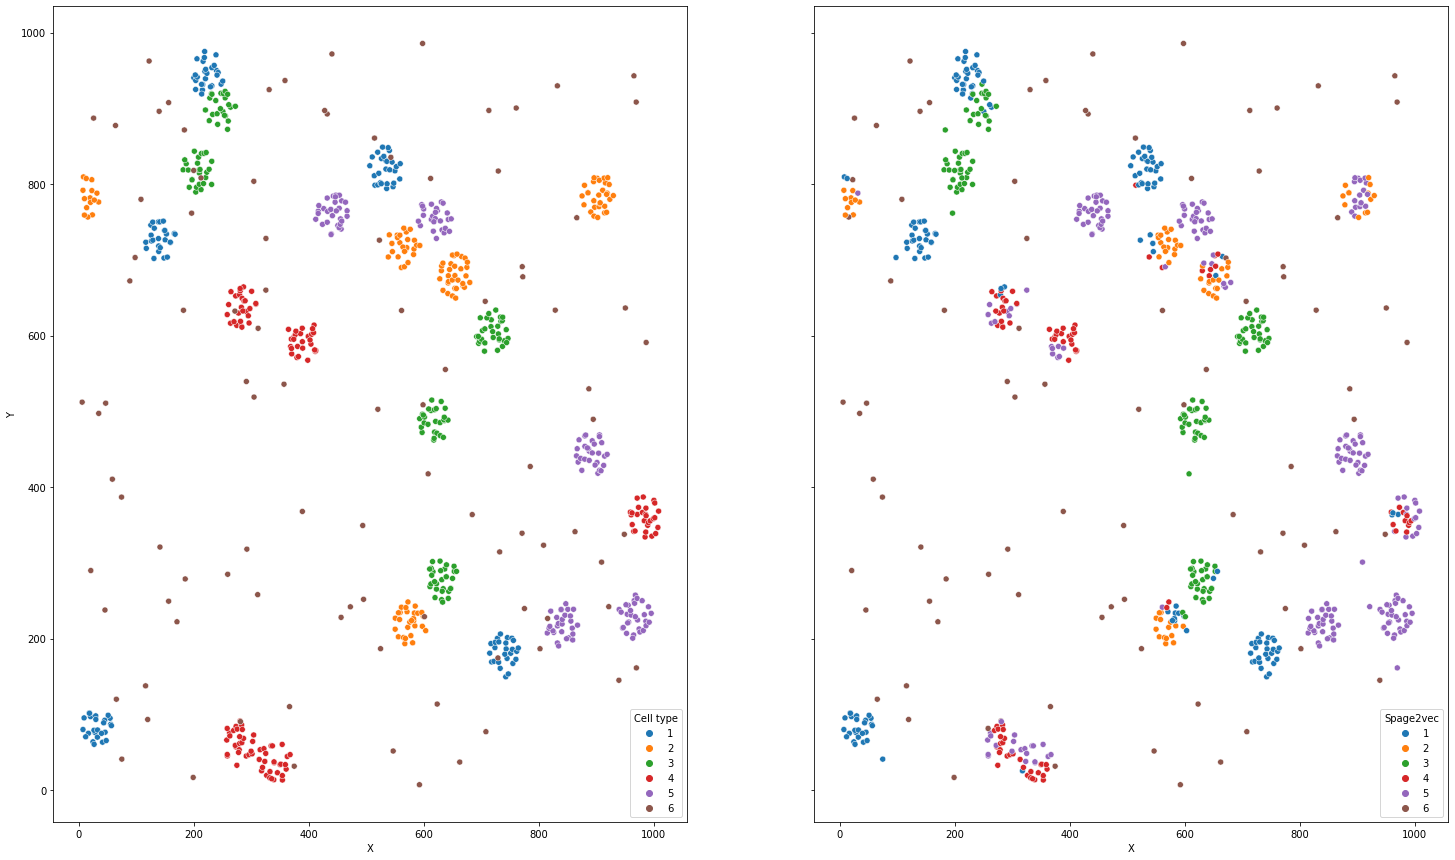

In [138]:
#99 percentage radius
category_order = ['1','2','3','4','5','6']

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(25,15))
sns.scatterplot(df, x='X', y='Y', hue='Cell type', ax=axs[0], hue_order=category_order)
sns.scatterplot(df, x='X', y='Y', hue='Spage2vec', ax=axs[1], hue_order=category_order)
1-hamming_loss(df['Cell type'], df['Spage2vec'])

In [139]:
f1_score(df['Cell type'], df['Spage2vec'], average=None)

array([0.87457627, 0.71921182, 0.94584838, 0.6875    , 0.77837838,
       0.87700535])

0.8136246786632391


array([0.86378738, 0.74396135, 0.91176471, 0.7079646 , 0.77717391,
       0.86813187])

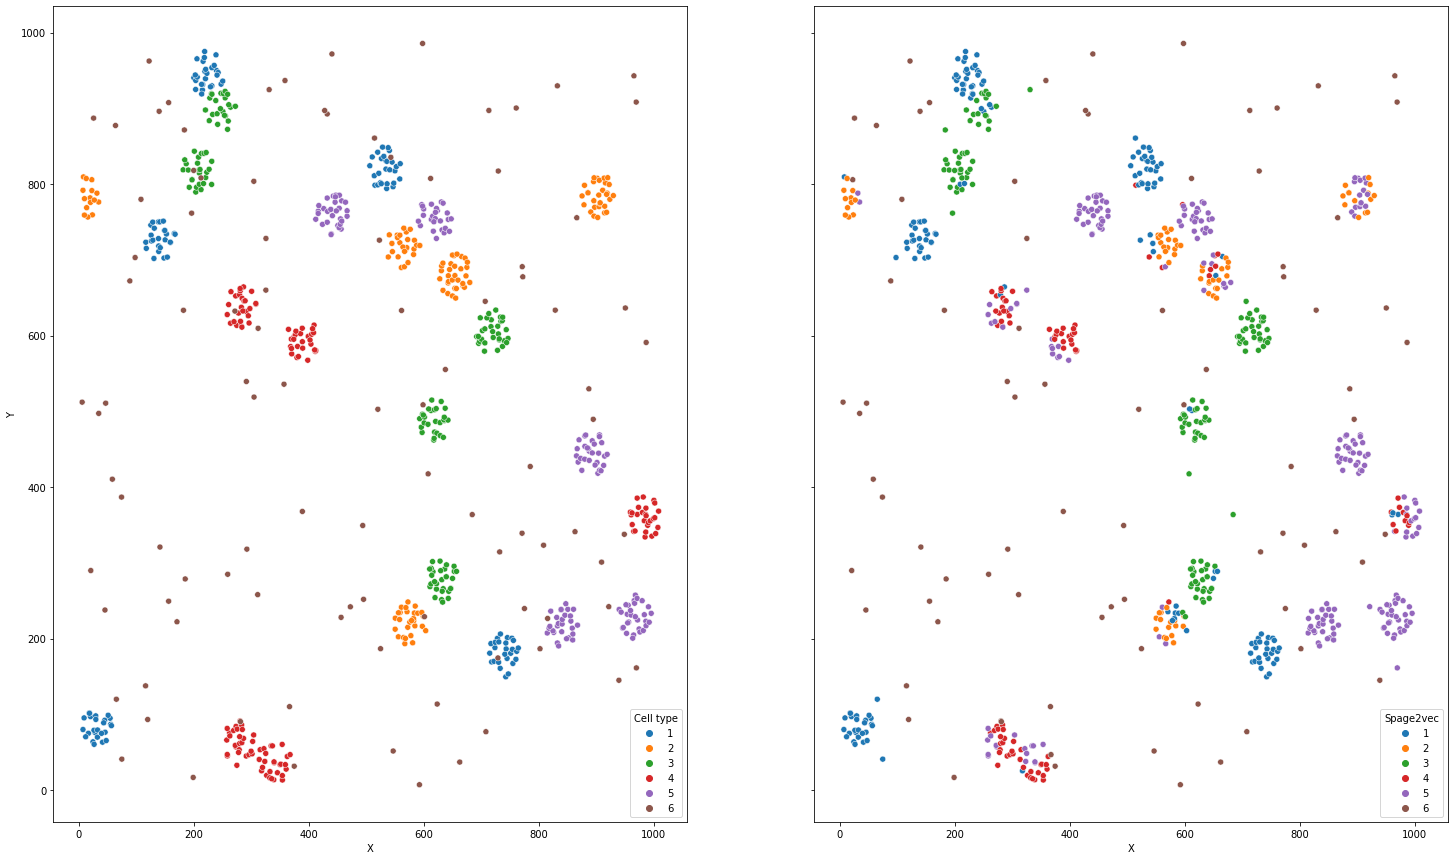

In [161]:
#95 percentage radius
category_order = ['1','2','3','4','5','6']

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(25,15))
sns.scatterplot(df, x='X', y='Y', hue='Cell type', ax=axs[0], hue_order=category_order)
sns.scatterplot(df, x='X', y='Y', hue='Spage2vec', ax=axs[1], hue_order=category_order)
print(1-hamming_loss(df['Cell type'], df['Spage2vec']))
f1_score(df['Cell type'], df['Spage2vec'], average=None)

0.8470437017994858


array([0.89122807, 0.76777251, 0.94964029, 0.73151751, 0.84365782,
       0.88172043])

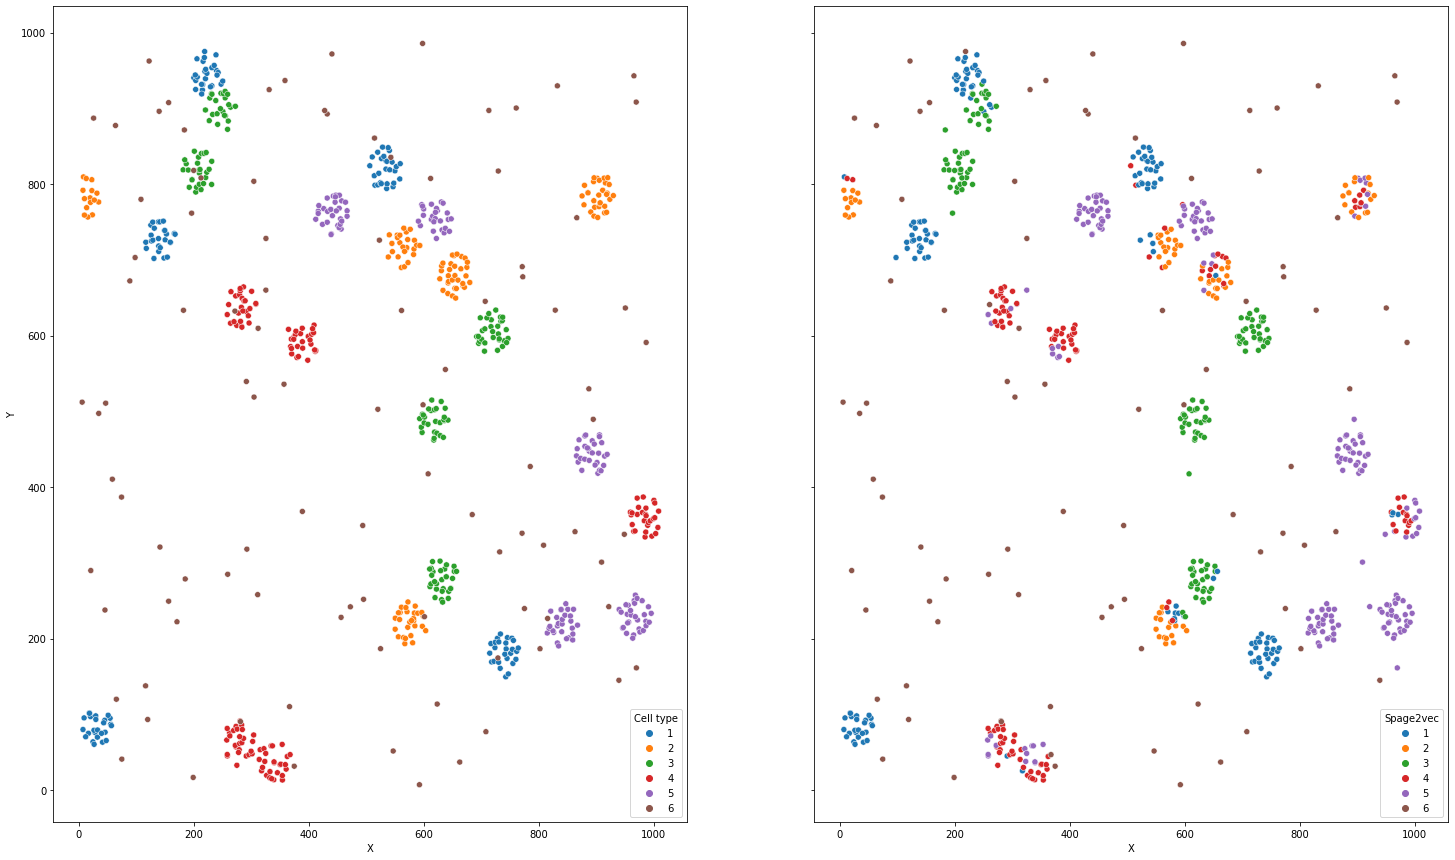

In [181]:
#90 percentage radius
category_order = ['1','2','3','4','5','6']

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(25,15))
sns.scatterplot(df, x='X', y='Y', hue='Cell type', ax=axs[0], hue_order=category_order)
sns.scatterplot(df, x='X', y='Y', hue='Spage2vec', ax=axs[1], hue_order=category_order)
print(1-hamming_loss(df['Cell type'], df['Spage2vec']))
f1_score(df['Cell type'], df['Spage2vec'], average=None)

0.8161953727506427


array([0.88659794, 0.77358491, 0.92473118, 0.63551402, 0.77005348,
       0.89247312])

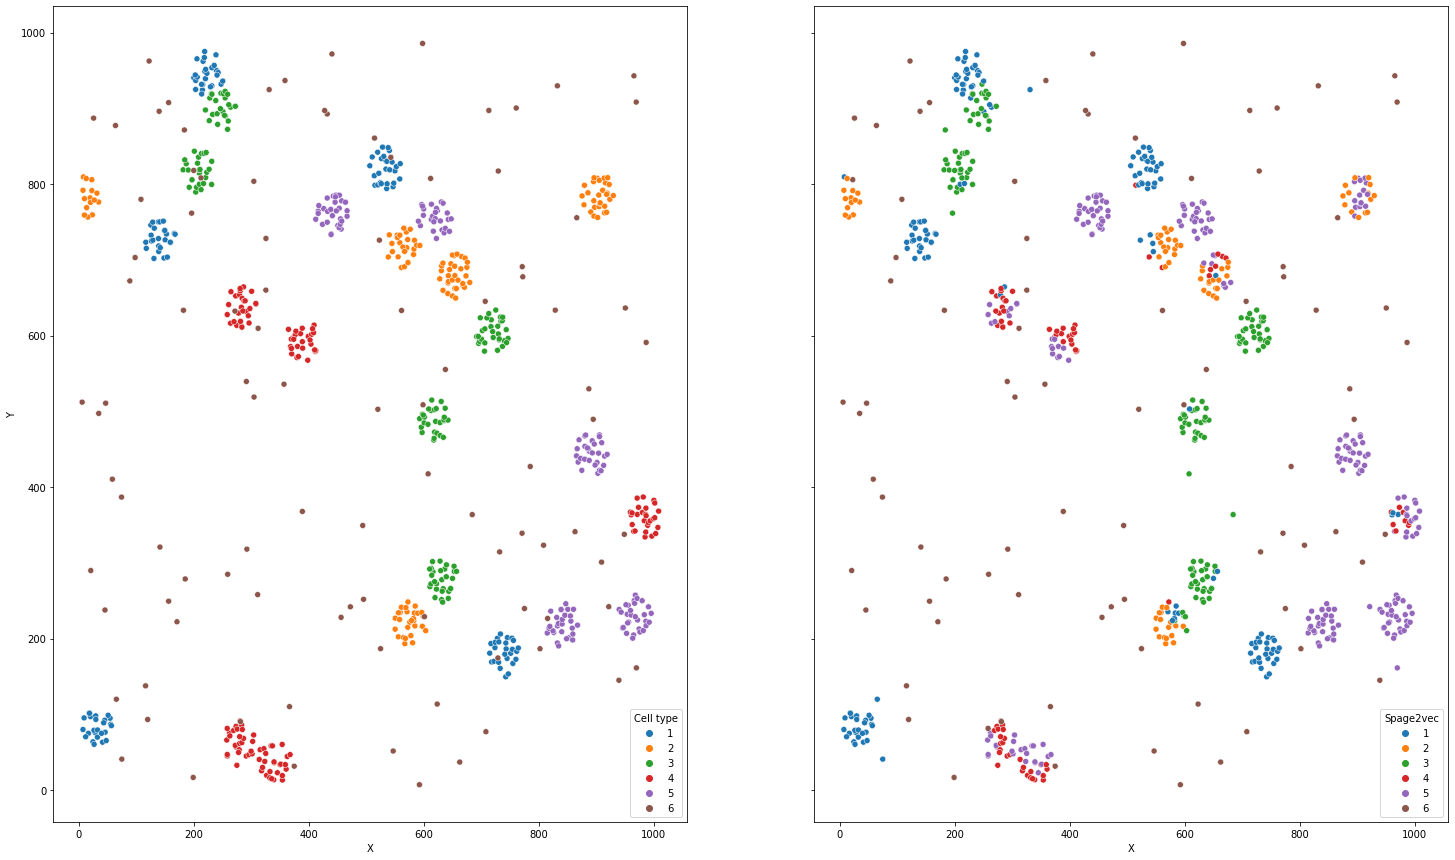

In [201]:
#95 percentage radius, 15 neighbors
category_order = ['1','2','3','4','5','6']

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(25,15))
sns.scatterplot(df, x='X', y='Y', hue='Cell type', ax=axs[0], hue_order=category_order)
sns.scatterplot(df, x='X', y='Y', hue='Spage2vec', ax=axs[1], hue_order=category_order)
print(1-hamming_loss(df['Cell type'], df['Spage2vec']))
f1_score(df['Cell type'], df['Spage2vec'], average=None)